In [1]:
import os
import numpy as np
import scipy.io
import pandas as pd
from pathlib import Path

In [2]:
database = pd.DataFrame(columns=['condition', 'name', 'ecg'])

# Create initial empty pandas database

In [3]:
from libraries.io import FileWizard

path1 = 'C:/Users/Oliver/Documents/FYP/code/database/MLII/'

fw = FileWizard()
database = fw.start(path1, database)
    
# Database details:

# The data contains 1000 ECG signals of size 3600
# There are 17 different heart rhythms in the dataset

# Conditions:

    # 1 NSR = Normal Sinus Rhythm [283 items]
    # 2 APB = Atrial Premature Beat [66 items]
    # 3 AFL = Atrial Flutter [20 items]
    # 4 AFIB = Atrial Fibrilation [135 items]
    # 5 SVTA = Superventricular tachycardia (abnormally fast heart beat above ventricular area) [13 items]
    # 6 WPW = Wolf-Parkinson White Syndrome [21 items]
    # 7 

In [4]:
print(database.head(5))

  condition      name                                                ecg
0     1 NSR  100m (0)  [953, 951, 949, 948, 950, 950, 951, 948, 946, ...
1     1 NSR  100m (1)  [915, 927, 934, 936, 935, 938, 938, 936, 935, ...
2     1 NSR  100m (2)  [989, 984, 981, 981, 983, 987, 984, 982, 982, ...
3     1 NSR  100m (3)  [957, 961, 961, 960, 960, 961, 964, 968, 968, ...
4     1 NSR  100m (4)  [942, 943, 943, 944, 948, 954, 955, 954, 955, ...


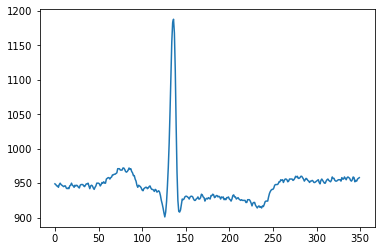

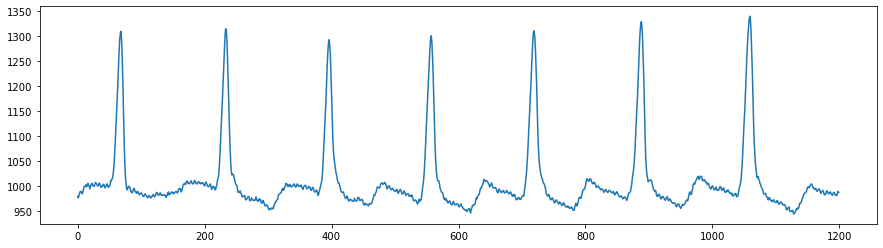

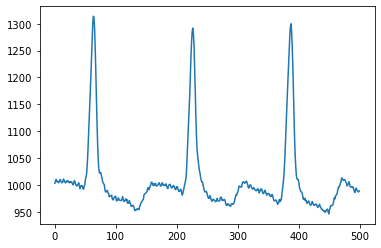

In [5]:
import matplotlib.pyplot as plt

case = '1 NSR'
examples = database[database['condition'] == case]
example = examples.iloc[1]
example_ecg = example['ecg']
example_small = example_ecg[150:500]
plt.plot(example_small)
plt.show()

case = '3 AFL'
examples = database[database['condition'] == case]
example = examples.iloc[1]
example_ecg = example['ecg']
plt.figure(figsize=(15,4))
plt.plot(example_ecg[0:1200])
plt.show()
example_small = example_ecg[170:670]
plt.plot(example_small)
plt.show()

In [6]:
def plot_example(case, data, title, i):
    examples = data[data['condition'] == case]
    example = examples.iloc[i]
    example_ecg = example['ecg']
    
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(example_ecg)
    plt.show()
    
def plot_ext(case, data, title, i):
    examples = data[data['condition'] == case]
    example = examples.iloc[i]
    example_ecg = example['large frequencies']
    
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(example_ecg)
    plt.show()

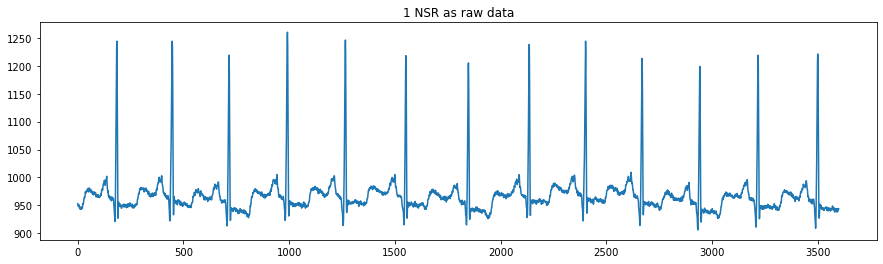

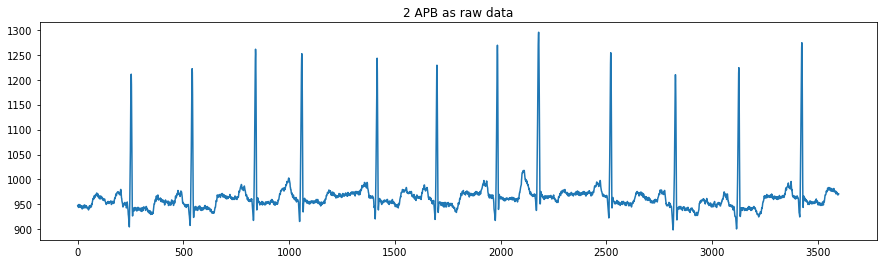

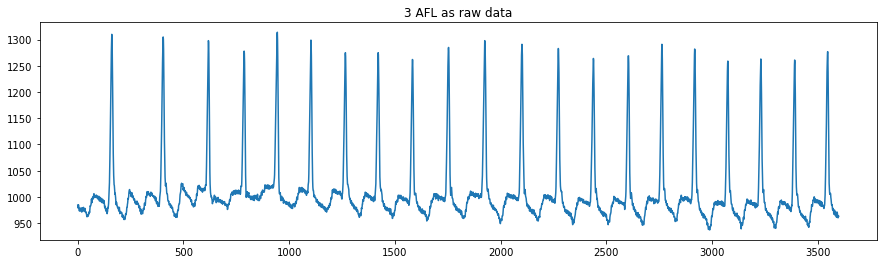

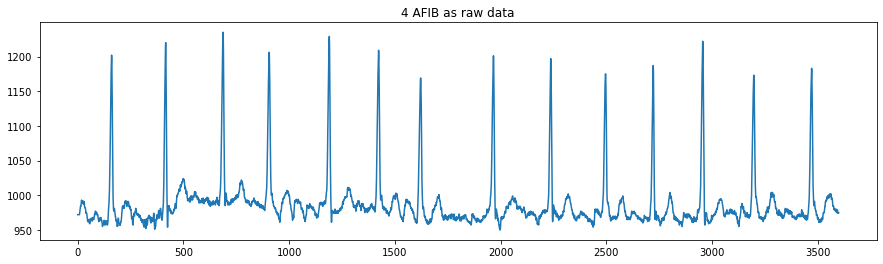

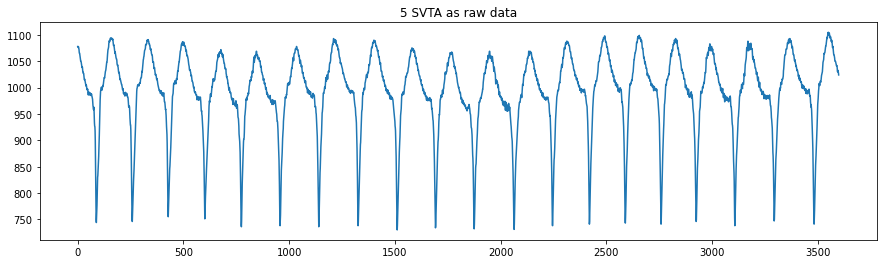

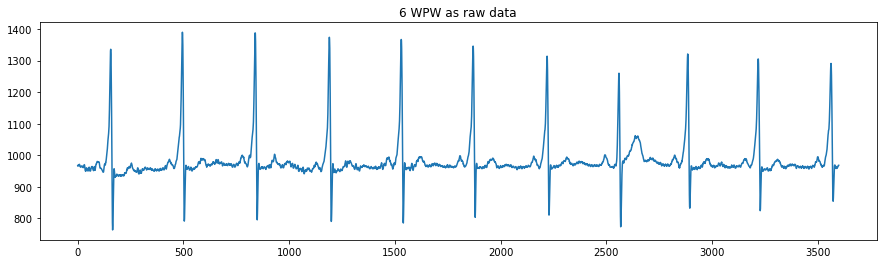

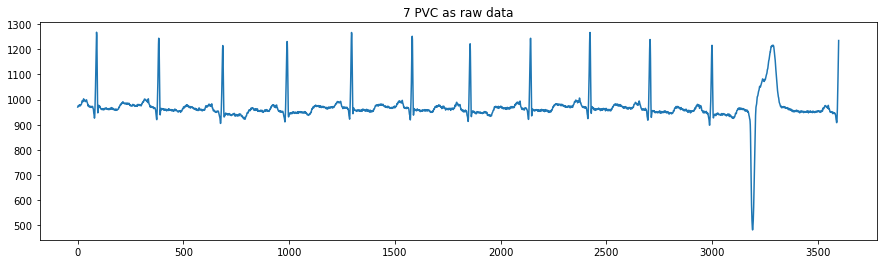

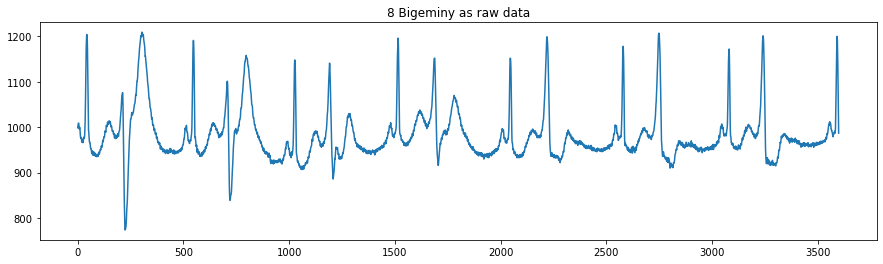

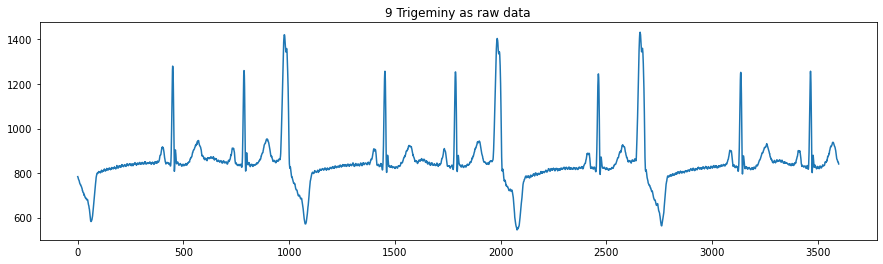

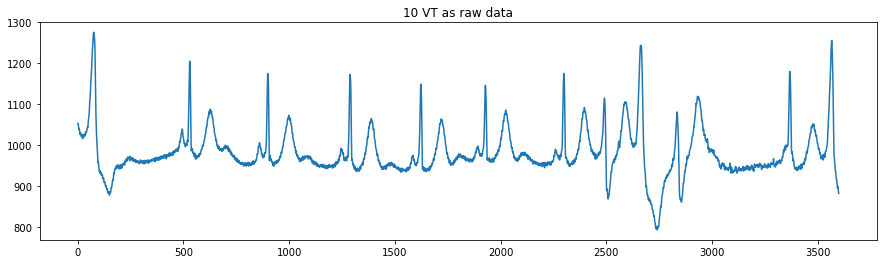

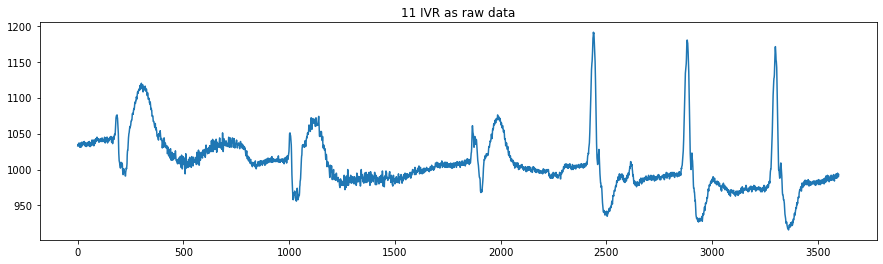

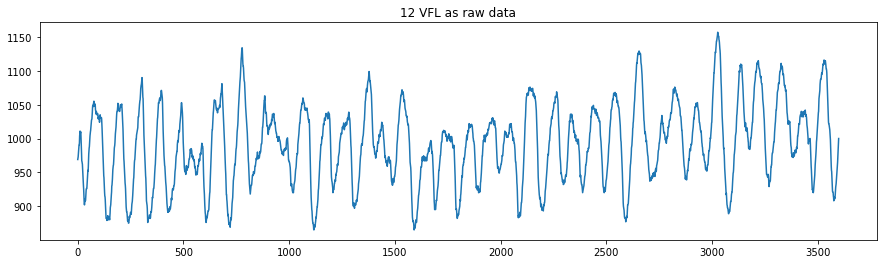

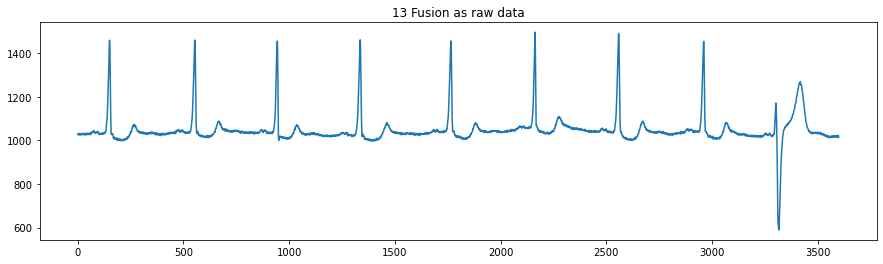

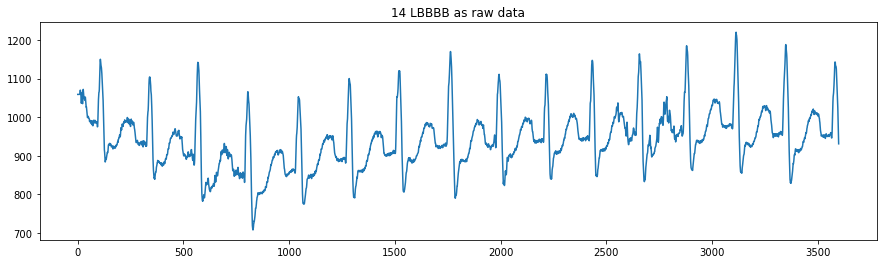

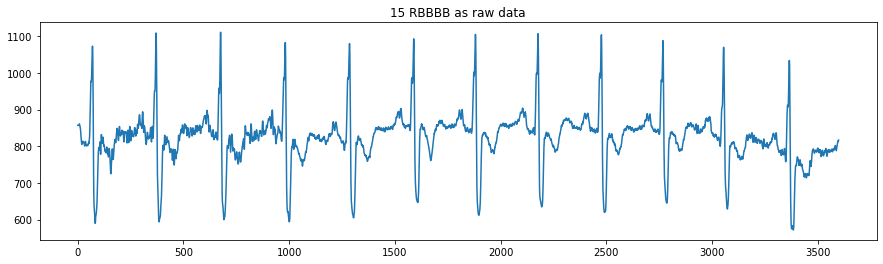

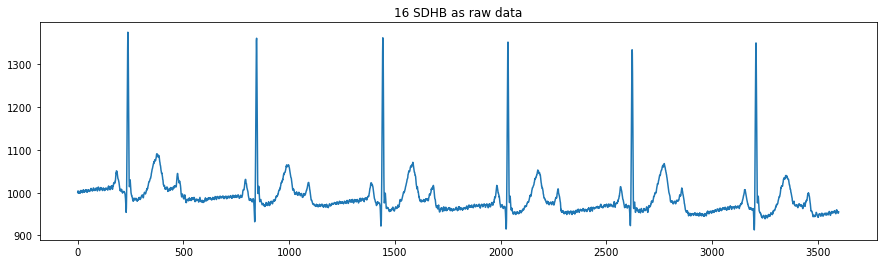

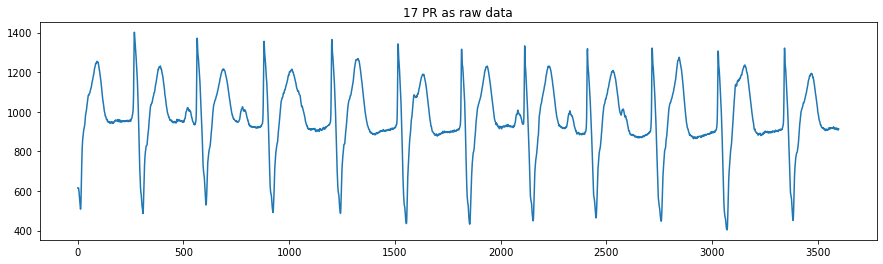

In [7]:
lists = ['1 NSR', '2 APB', '3 AFL', '4 AFIB', '5 SVTA', '6 WPW', 
         '7 PVC', '8 Bigeminy', '9 Trigeminy', '10 VT', '11 IVR', 
         '12 VFL', '13 Fusion', '14 LBBBB', '15 RBBBB', '16 SDHB', '17 PR']

for item in lists:
    plot_example(item, database, (item + ' as raw data'), 0)

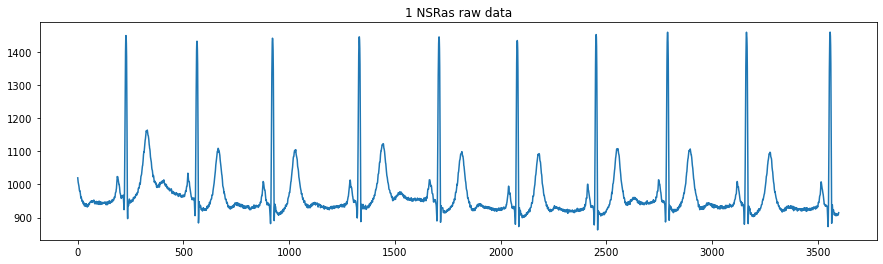

In [8]:
plot_example('1 NSR', database, ('1 NSR' + 'as raw data'), 50)

In [9]:
from libraries.noise_removal import BaselineNoiseRemover

# DC Notch filter to remove baseline noise from all signals

bnr = BaselineNoiseRemover(c = -0.99)

ecg_waves = database['ecg'].tolist()
ecg_filt = []

for wave in ecg_waves:
    filt = bnr.fit(wave)
    ecg_filt.append(filt)

database['ecg'] = pd.Series(ecg_filt)

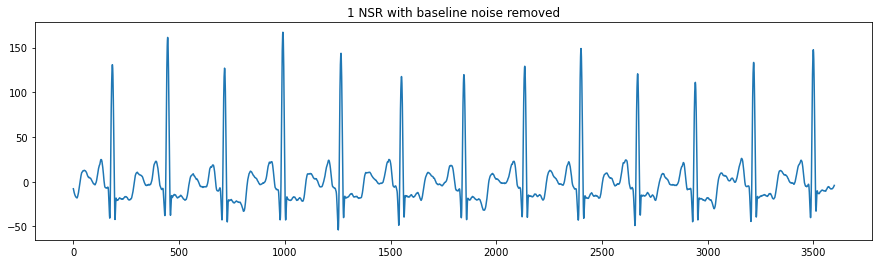

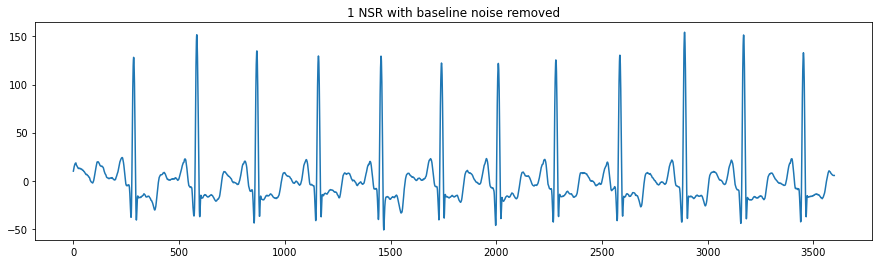

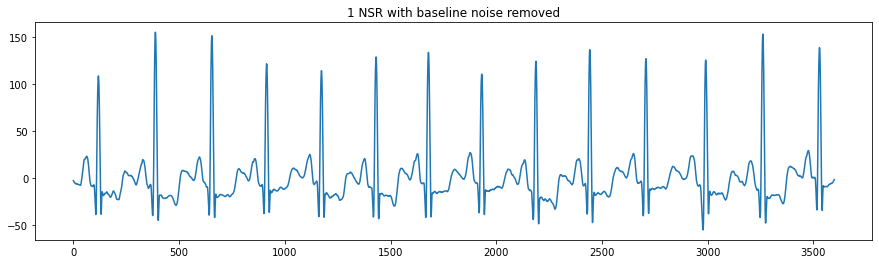

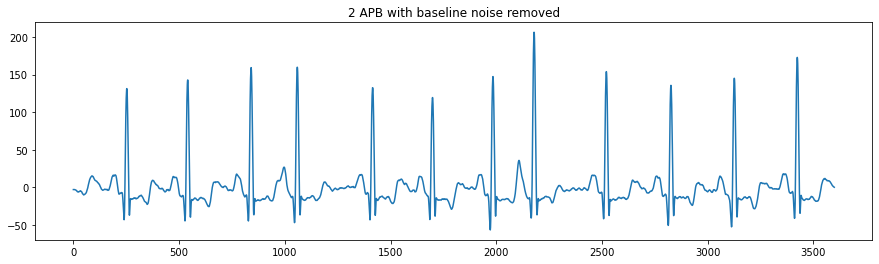

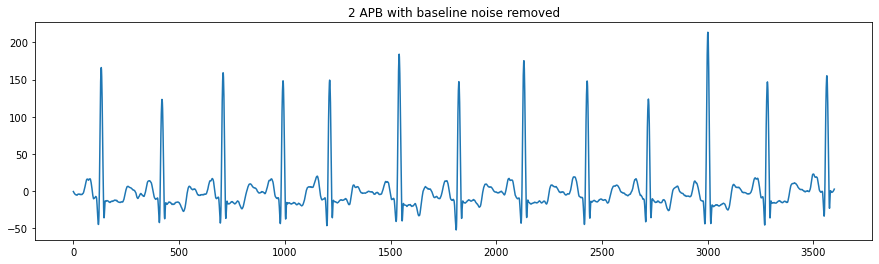

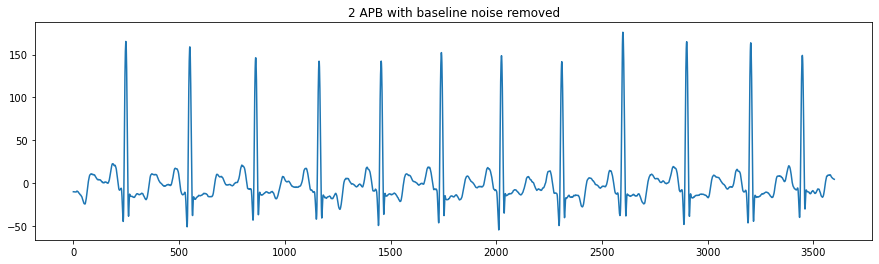

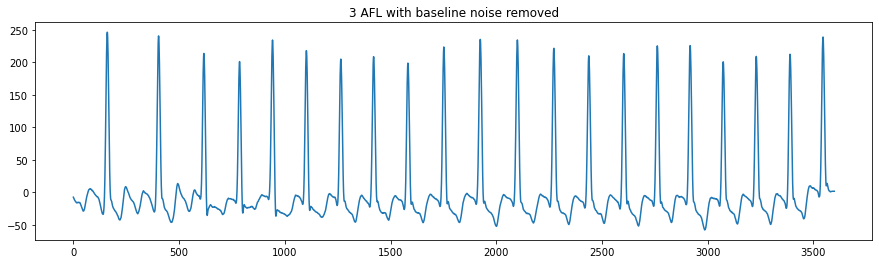

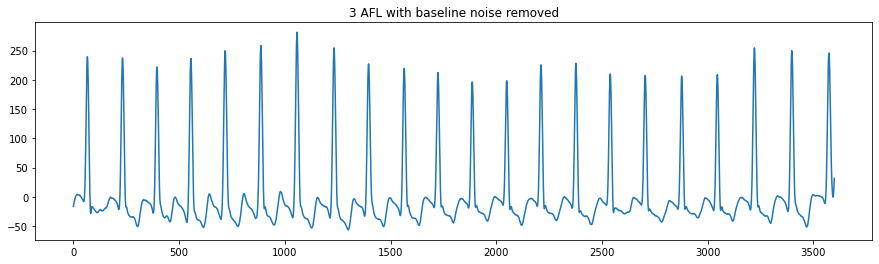

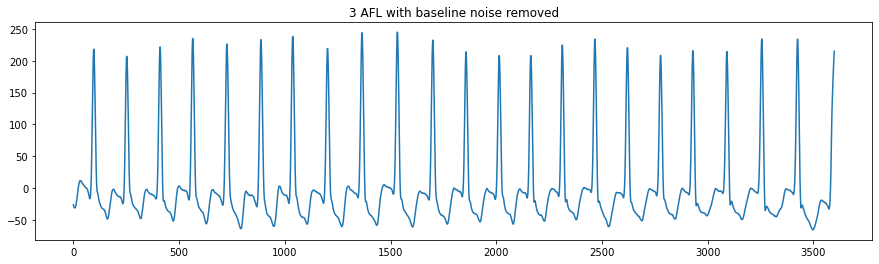

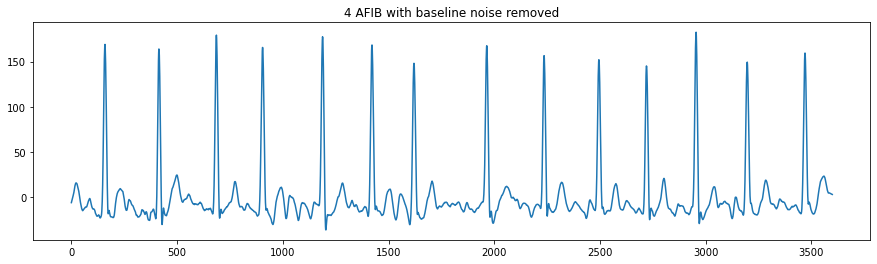

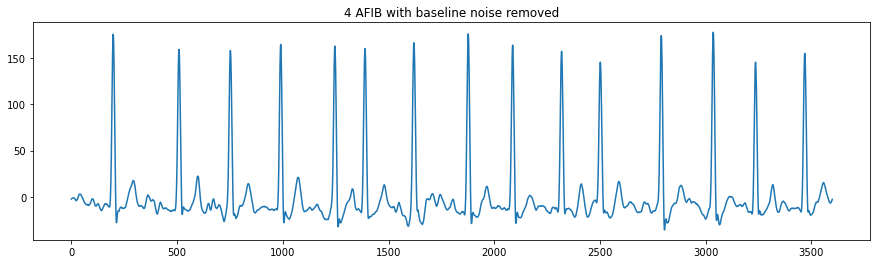

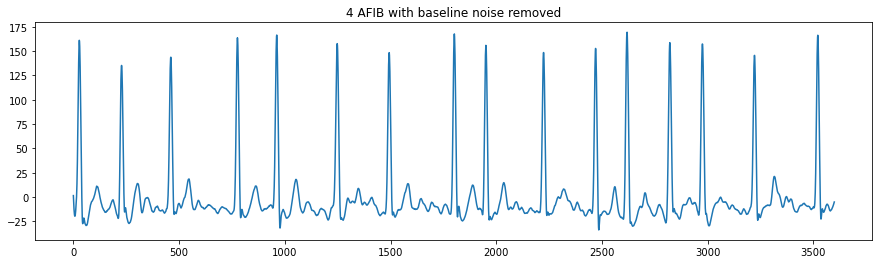

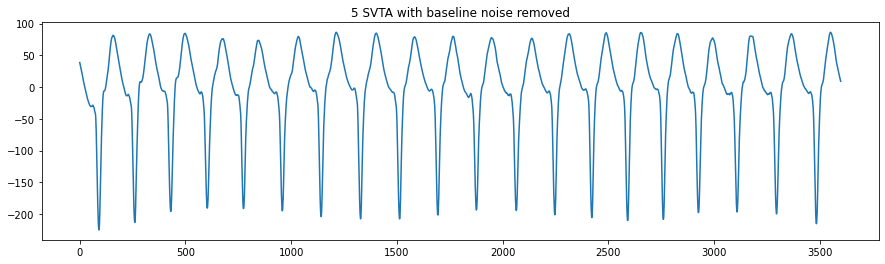

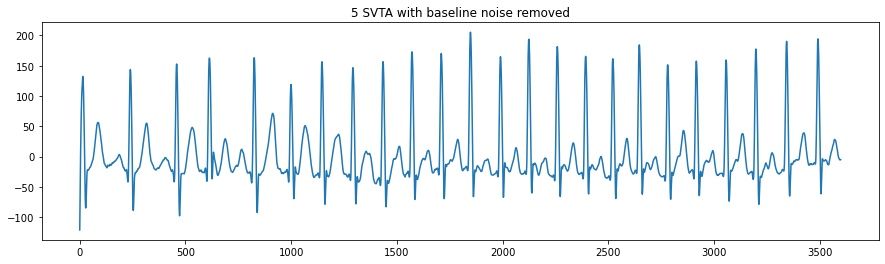

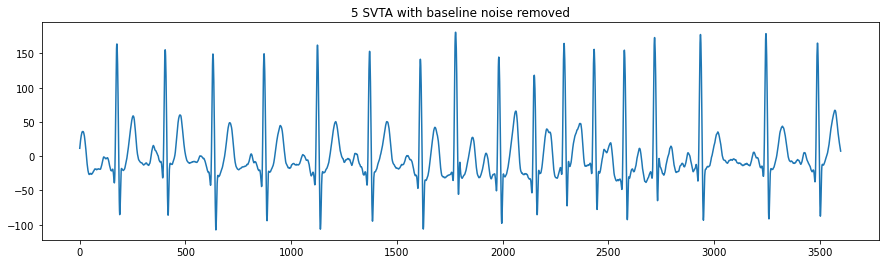

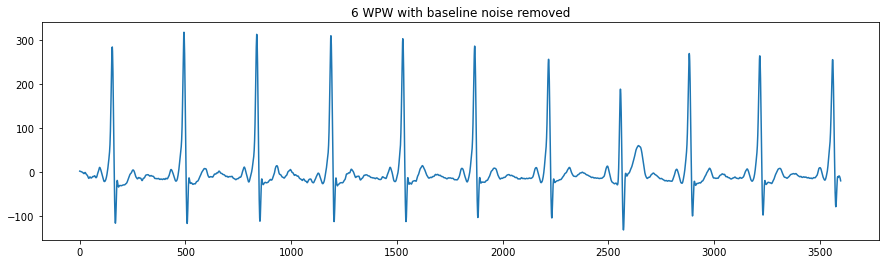

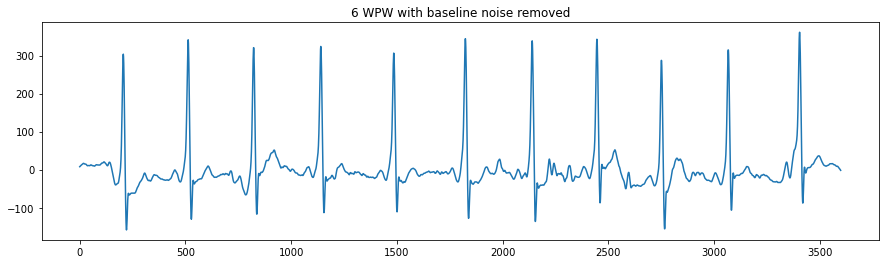

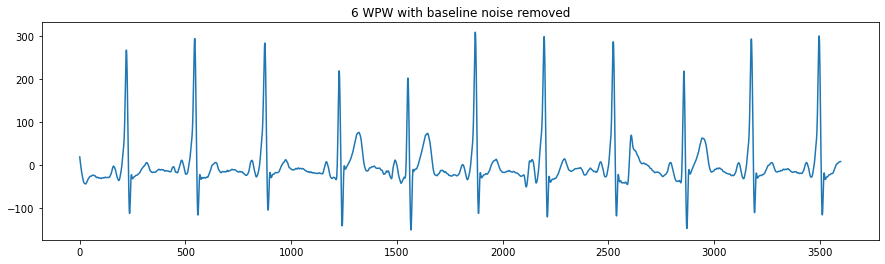

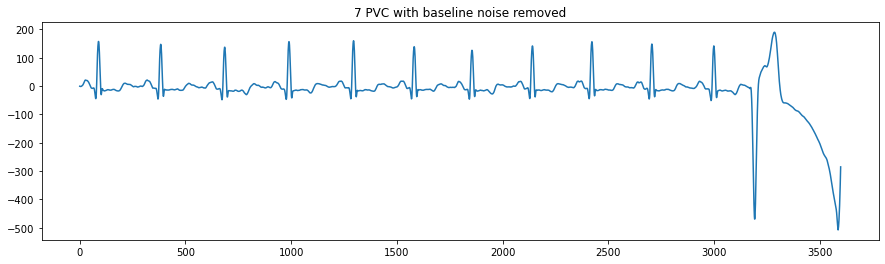

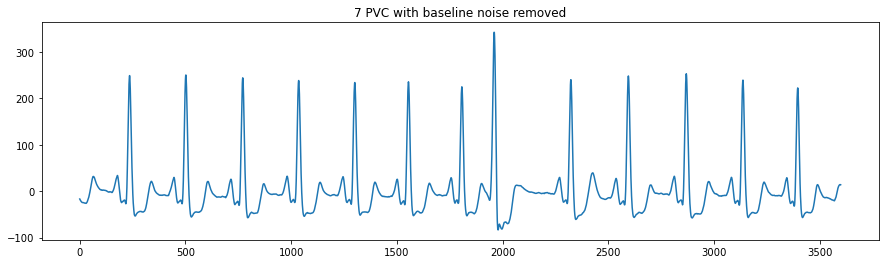

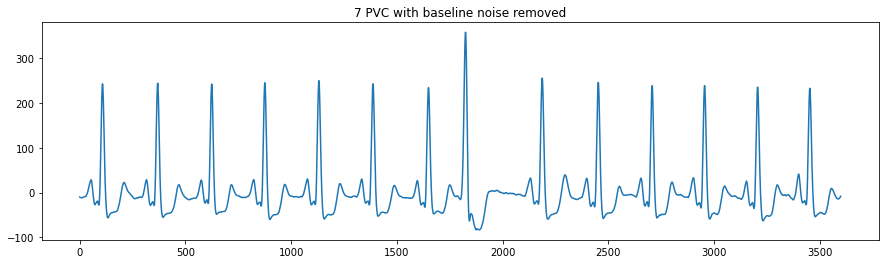

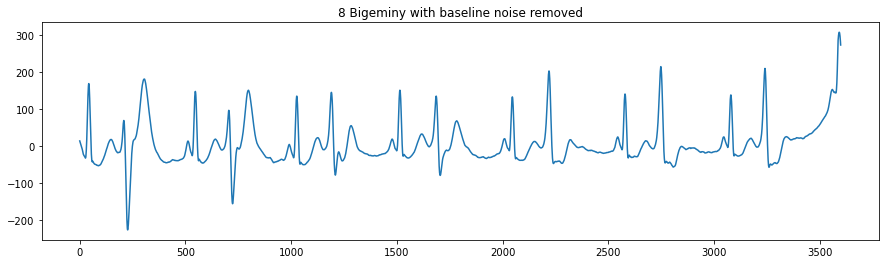

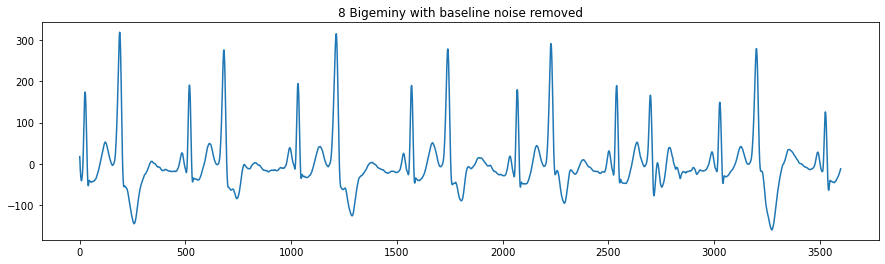

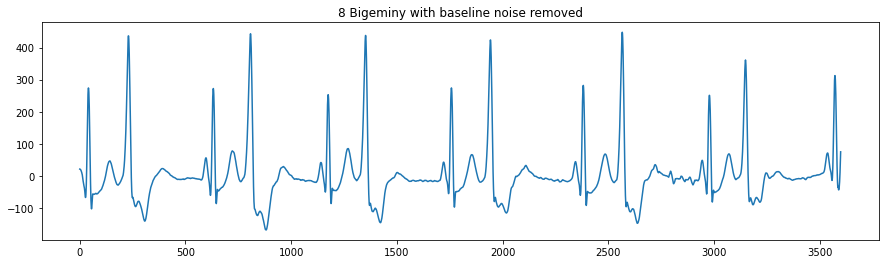

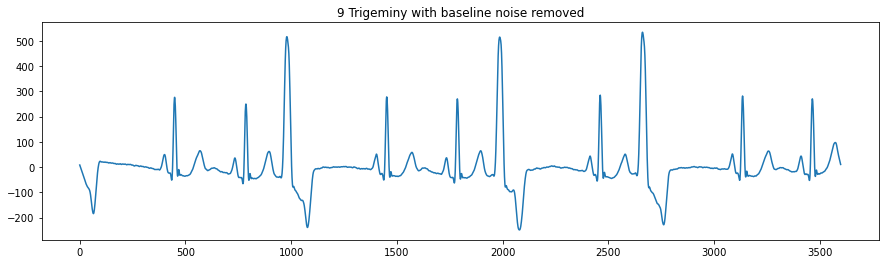

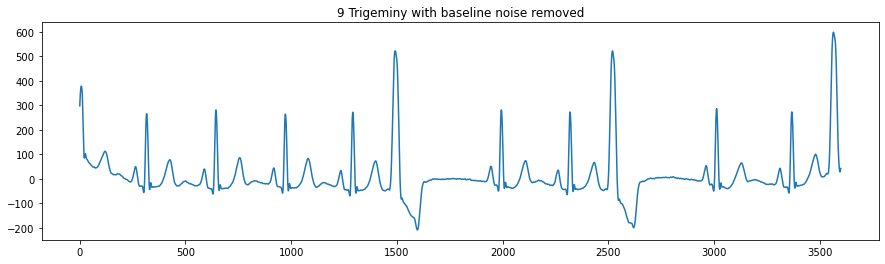

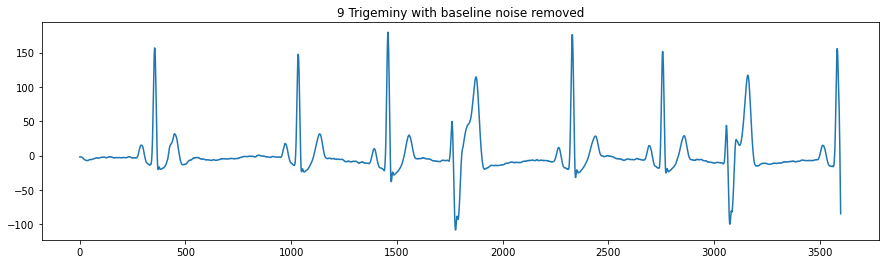

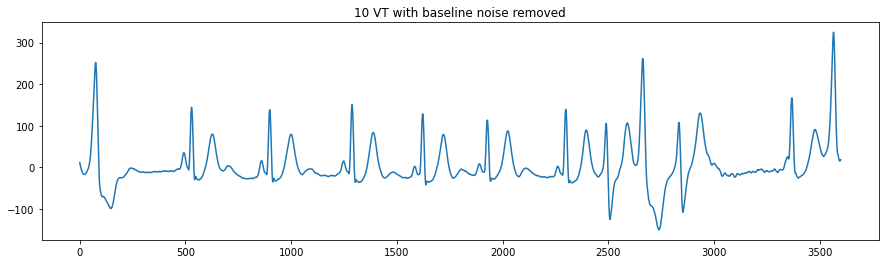

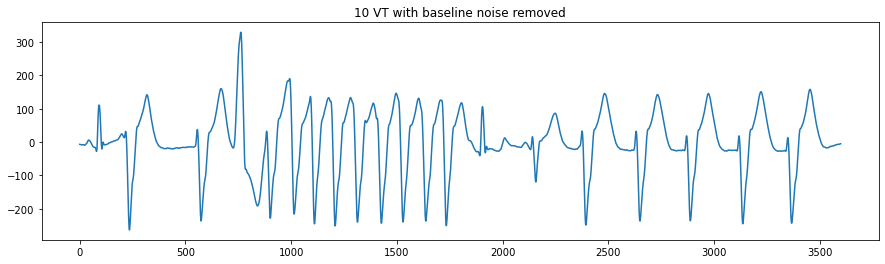

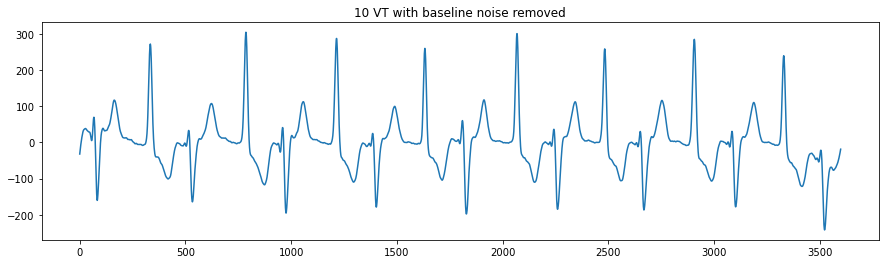

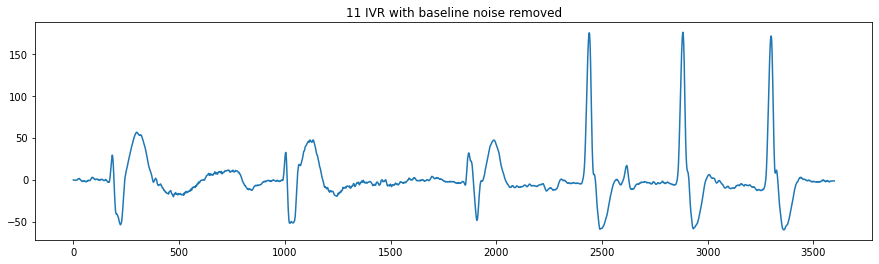

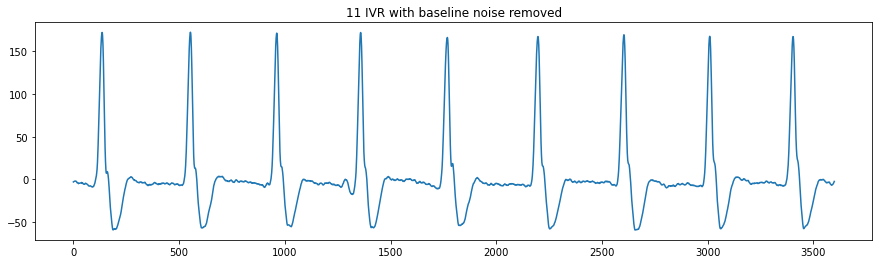

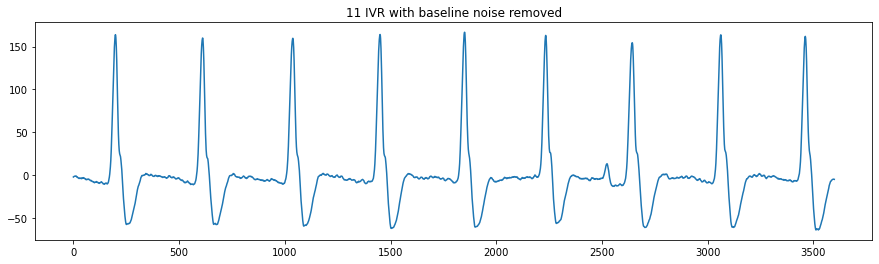

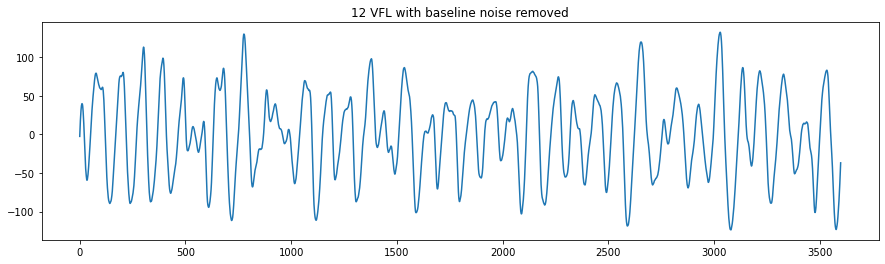

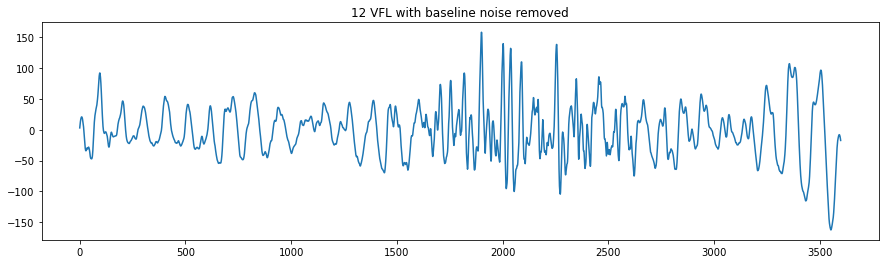

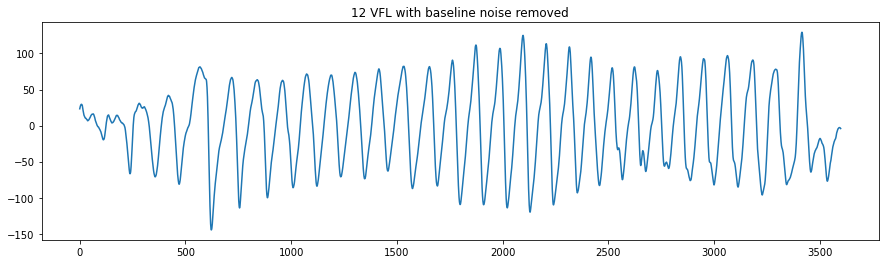

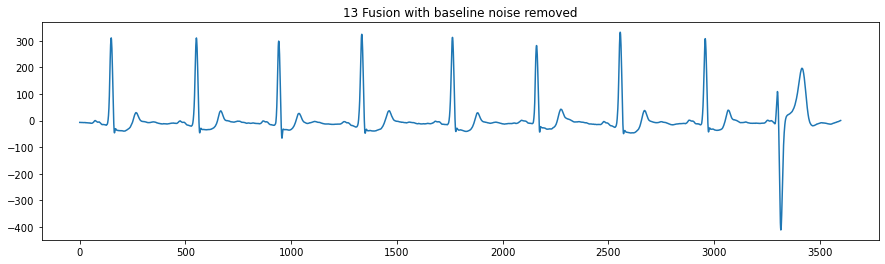

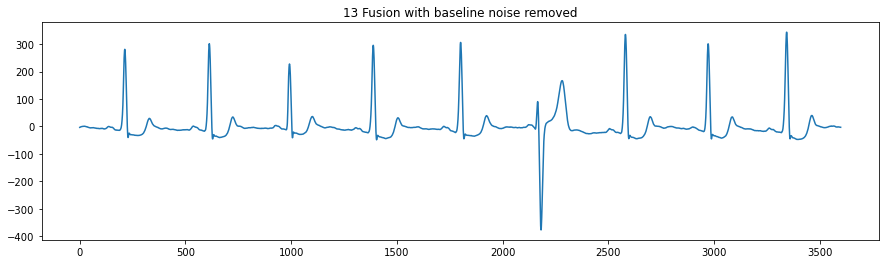

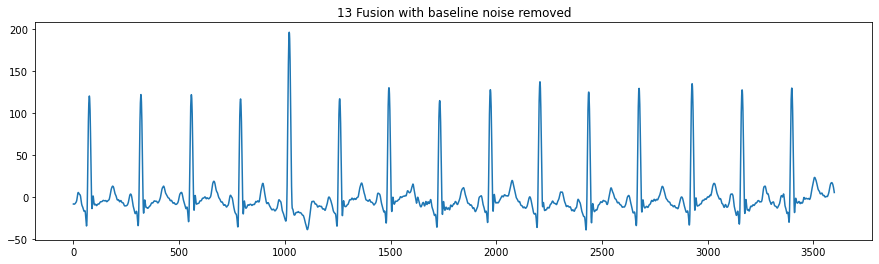

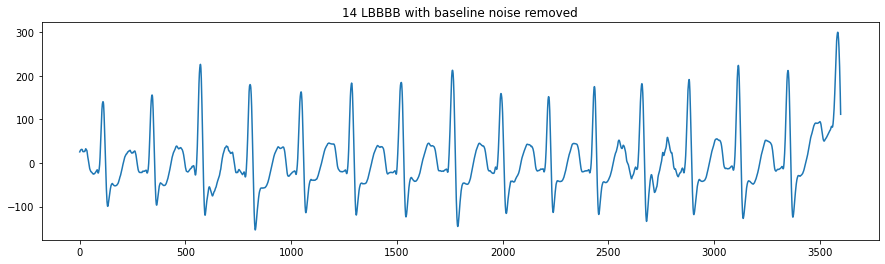

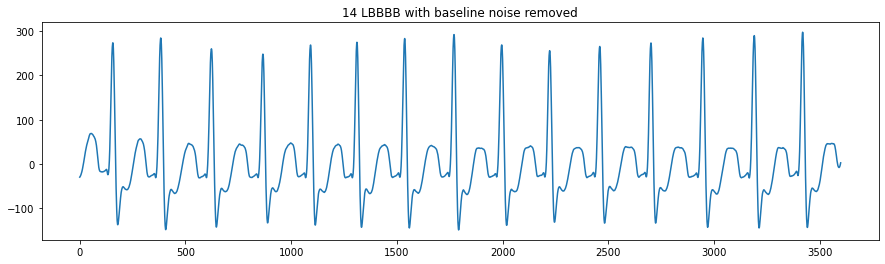

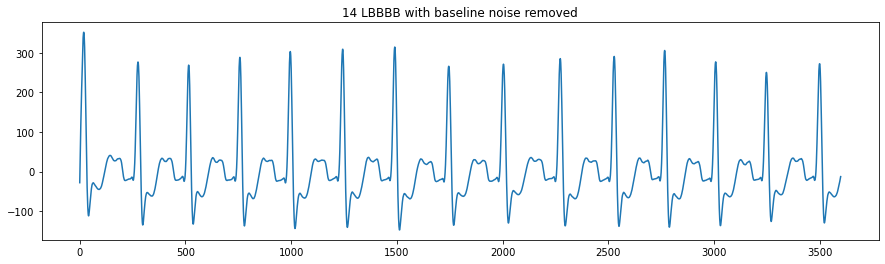

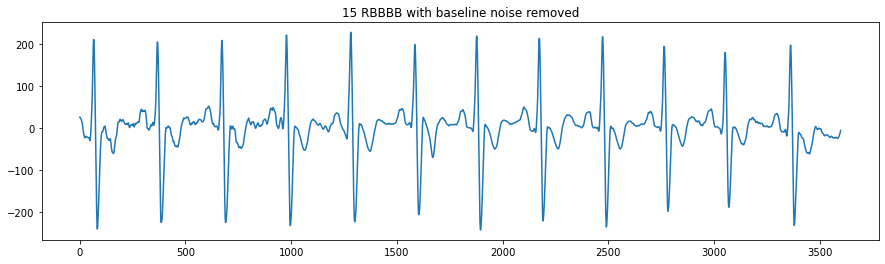

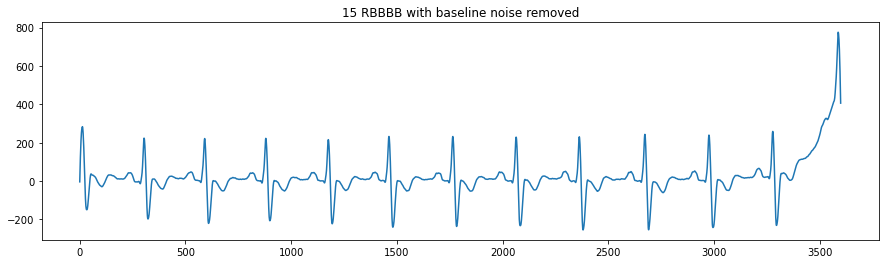

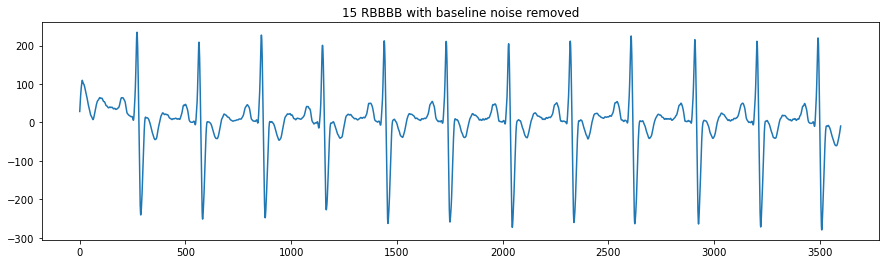

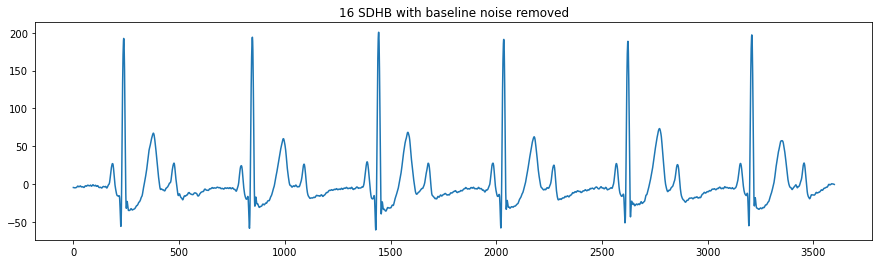

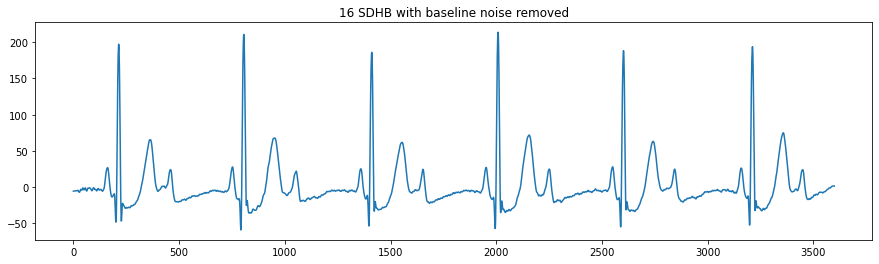

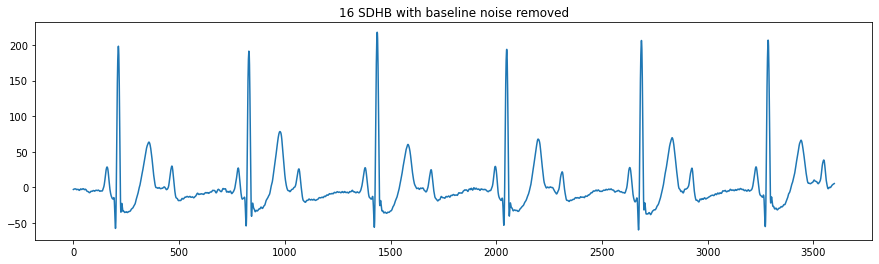

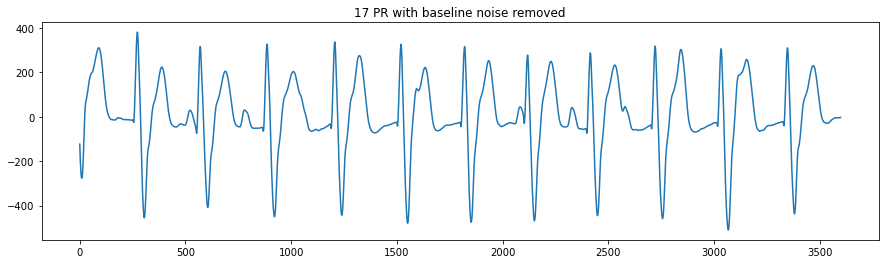

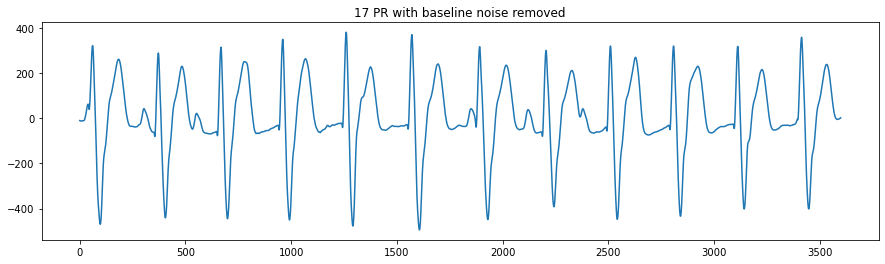

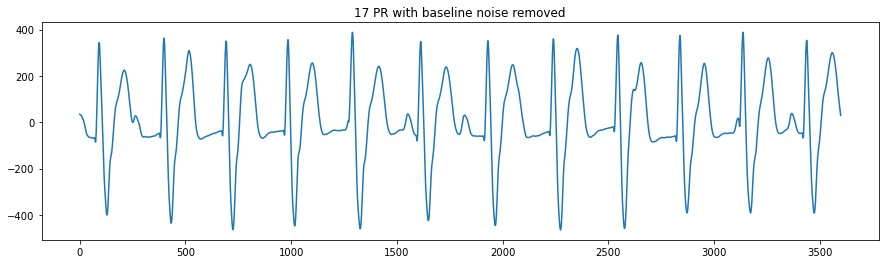

In [10]:
for item in lists:
    plot_example(item, database, (item + ' with baseline noise removed'), 0)
    plot_example(item, database, (item + ' with baseline noise removed'), 1)
    plot_example(item, database, (item + ' with baseline noise removed'), 2)

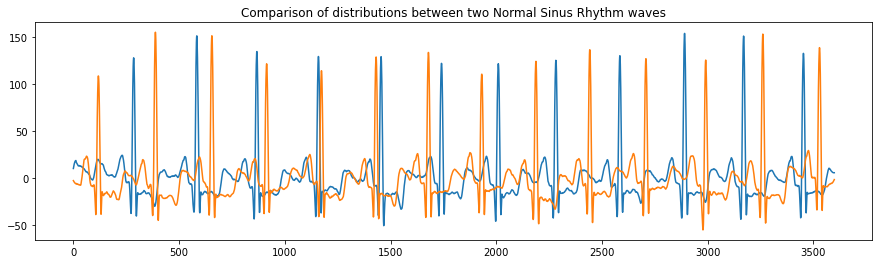

In [11]:
import seaborn as sns

examples = database[database['condition'] == '1 NSR']

example1 = examples.iloc[1]
example2 = examples.iloc[2]

ecg1 = example1['ecg']
ecg2 = example2['ecg']

plt.figure(figsize=(15,4))
plt.plot(ecg1)
plt.plot(ecg2)
plt.title('Comparison of distributions between two Normal Sinus Rhythm waves')
plt.show()

In [12]:
from libraries.distributions import DynamicTimeWarper

dtw = DynamicTimeWarper()

cost_matrix, path = dtw.fit(ecg1, ecg2)

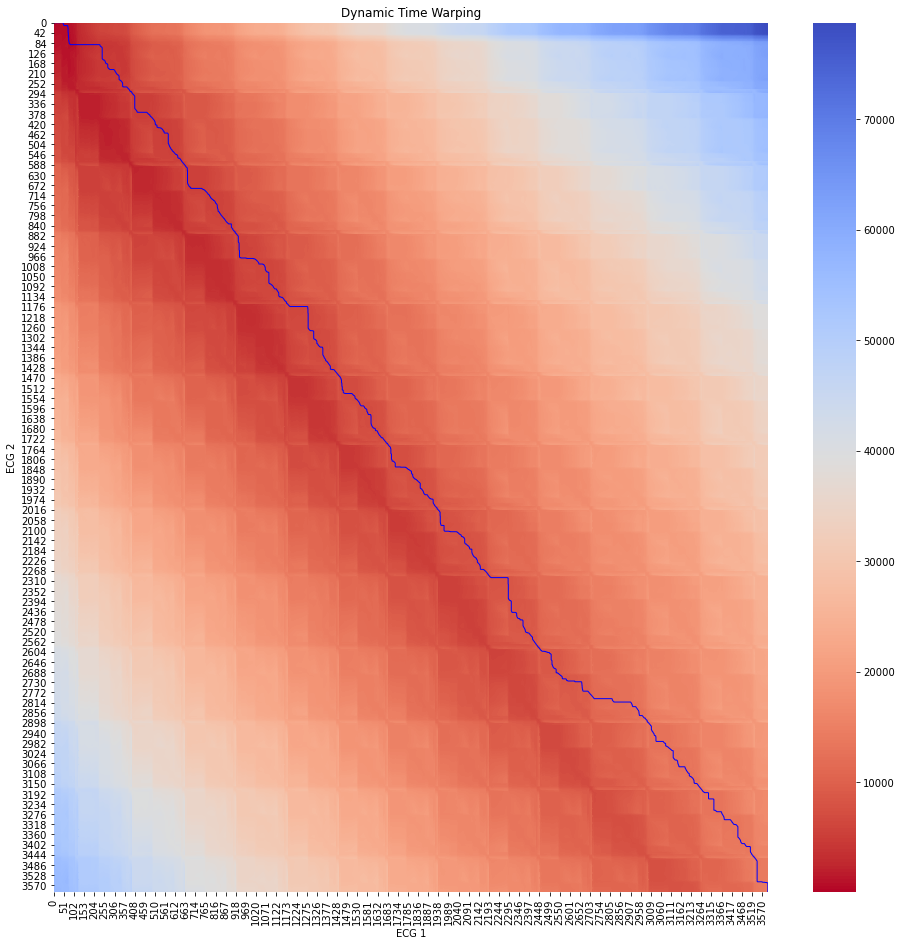

In [13]:
plt.figure(figsize=(16, 16))
ax = plt.axes()
sns.heatmap(cost_matrix, cmap='coolwarm_r', ax=ax)
ax.set_title("Dynamic Time Warping")
ax.set(xlabel='ECG 1', ylabel='ECG 2')

positions = path[1]
a = positions[:,1]
b = positions[:,0]
ax.plot(a + 0.5, b + 0.5, color='blue', linewidth=1)

In [14]:
from libraries.feature_extraction import FrequencyExtractor

fe = FrequencyExtractor()
database = fe.fit(database)
# Multilevel discrete decomposition to extract large frequencies from time series

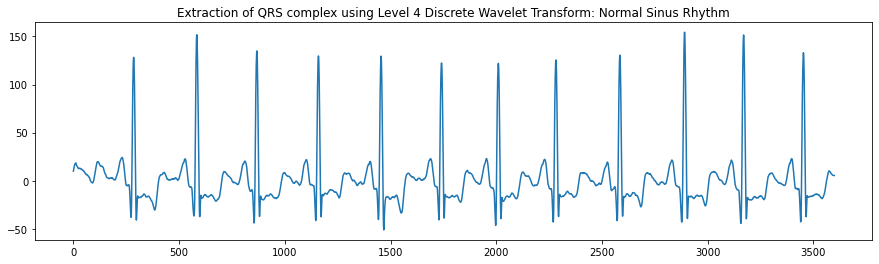

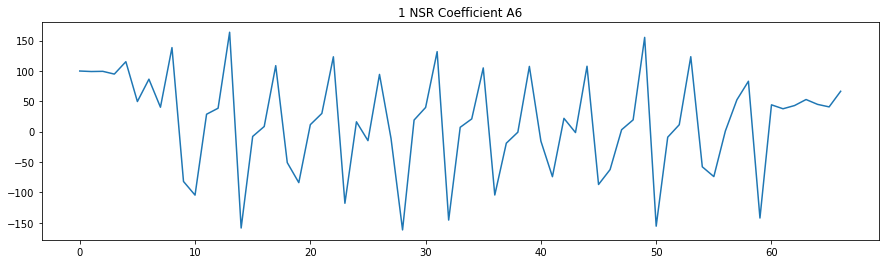

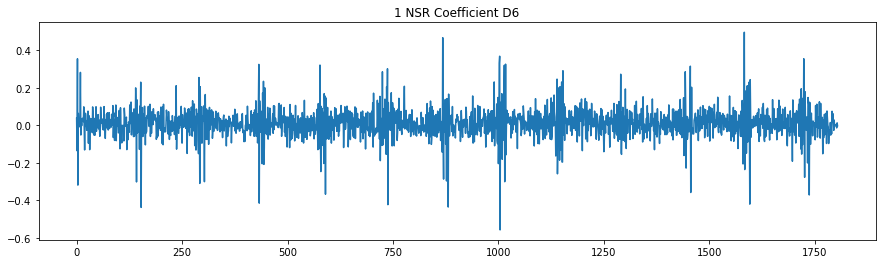

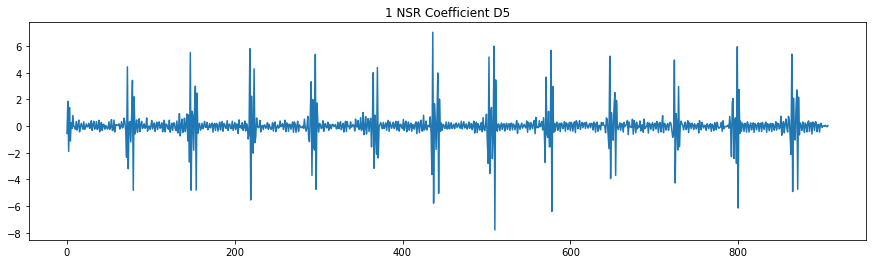

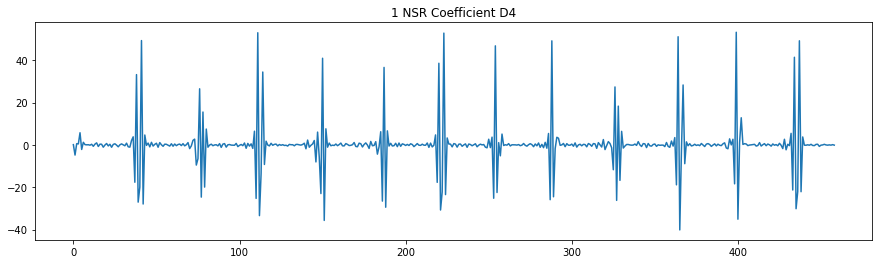

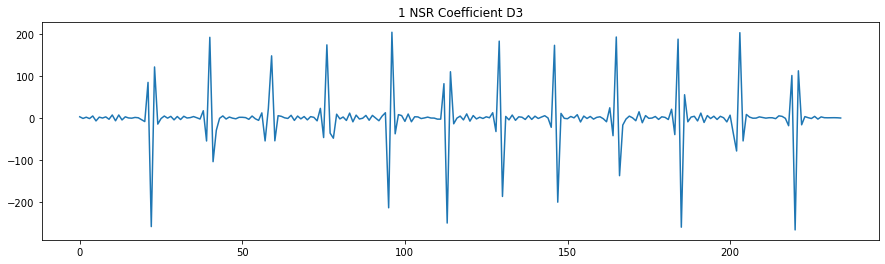

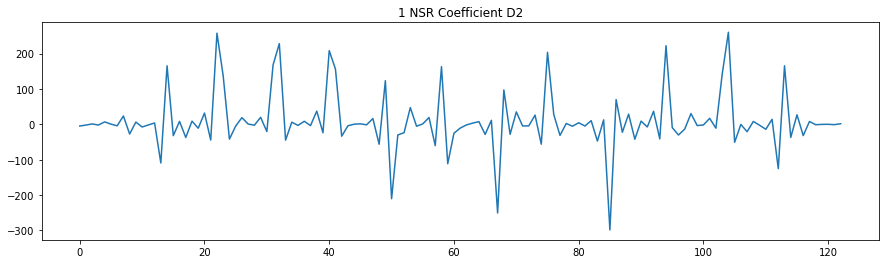

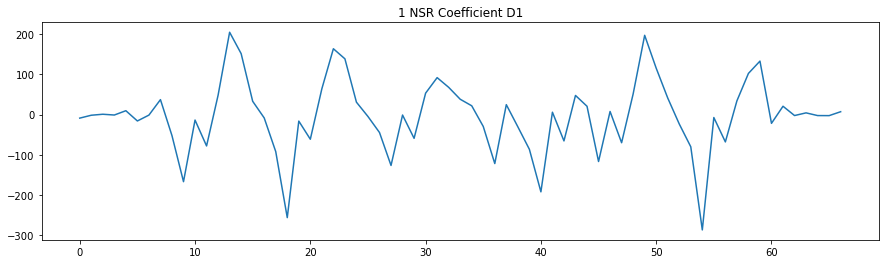

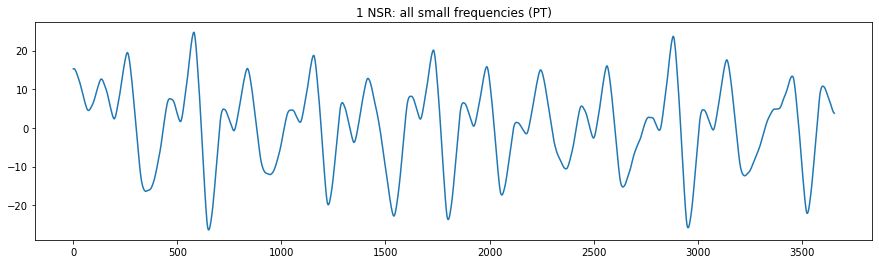

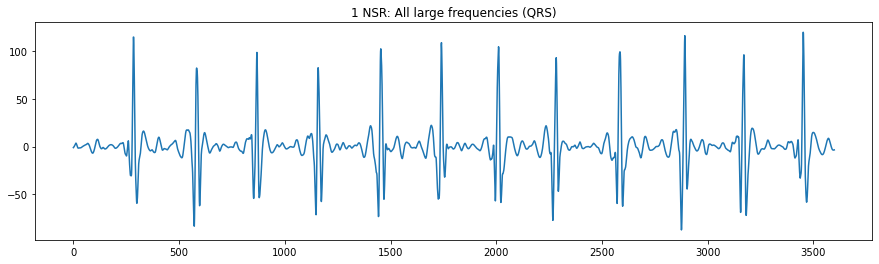

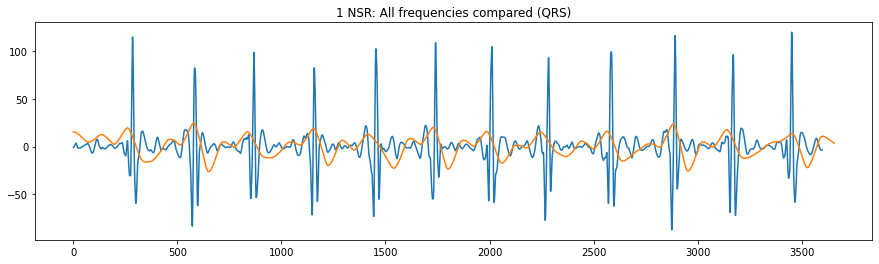

In [15]:
examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]

examples2 = database[database['condition'] == '3 AFL']
example2 = examples2.iloc[2]

plt.figure(figsize=(15,4))
plt.title('Extraction of QRS complex using Level 4 Discrete Wavelet Transform: Normal Sinus Rhythm')
plt.plot(example1['ecg'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient A6')
plt.plot(example1['coefficient a6'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D6')
plt.plot(example1['coefficient d6'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D5')
plt.plot(example1['coefficient d5'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D4')
plt.plot(example1['coefficient d4'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D3')
plt.plot(example1['coefficient d3'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D2')
plt.plot(example1['coefficient d2'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR Coefficient D1')
plt.plot(example1['coefficient d1'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR: all small frequencies (PT)')
plt.plot(example1['small frequencies'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR: All large frequencies (QRS)')
plt.plot(example1['large frequencies'])
plt.show()

plt.figure(figsize=(15,4))
plt.title('1 NSR: All frequencies compared (QRS)')
plt.plot(example1['large frequencies'])
plt.plot(example1['small frequencies'])
plt.show()

c1 = example1['large frequencies']

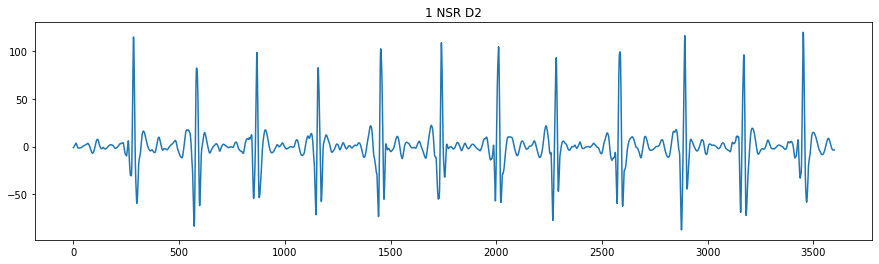

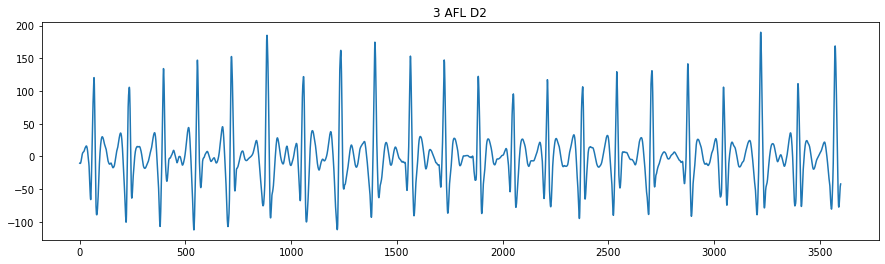

In [16]:
plot_ext('1 NSR', database,  '1 NSR D2', 1)
plot_ext('3 AFL', database,  '3 AFL D2', 1)

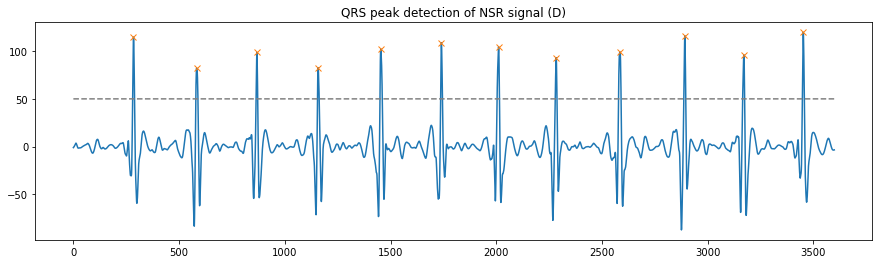

[ 284  583  868 1158 1454 1741 2011 2284 2585 2892 3172 3452] {'peak_heights': array([114.83581519,  82.34701607,  98.72983993,  82.67427364,
       102.50808202, 108.9772383 , 104.66288409,  93.19271781,
        99.36816148, 116.30697971,  96.16907455, 119.91087634])}


In [17]:
from libraries.feature_extraction import PeakExtractor

LISTS2 = ['2 APB', '4 AFIB', '5 SVTA', '6 WPW', 
         '7 PVC', '8 Bigeminy', '9 Trigeminy', '10 VT', '11 IVR', 
         '12 VFL', '13 Fusion', '14 LBBBB', '15 RBBBB', '16 SDHB', '17 PR']

for item in LISTS2:
    database = database[database['condition'] != item]

thresh = 50
pe = PeakExtractor(c=thresh)
database = pe.fit(database)

examples = database[database['condition'] == '1 NSR']
example1 = examples.iloc[1]
peaks1 = example1['peaks']
position1 = example1['peak position']
ecg1 = example1['large frequencies']

plt.figure(figsize=(15,4))
plt.title('QRS peak detection of NSR signal (D)')
plt.plot(ecg1)
plt.plot(peaks1, ecg1[peaks1], "x")
plt.plot(np.ones_like(ecg1) * thresh, "--", color="gray")
plt.show()

print(peaks1, position1) 

In [18]:
from libraries.feature_extraction import MidPointExtractor

mpe = MidPointExtractor()
database = mpe.fit(database)

In [19]:
examples = database[database['condition'] == '1 NSR']

In [20]:
midpoints = database['midpoints']

#for point in midpoints:
    #point = point.astype(int)

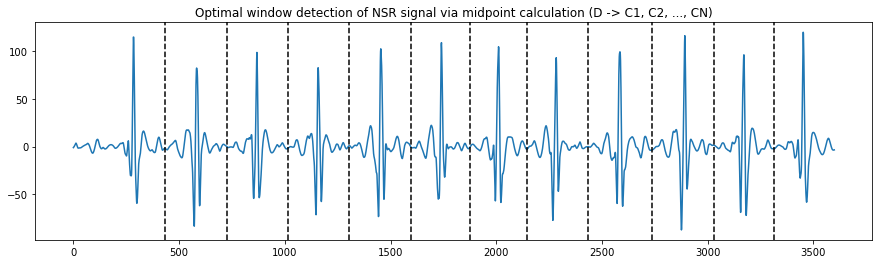

In [21]:
example1 = examples.iloc[1]

plt.figure(figsize=(15,4))
plt.title('Optimal window detection of NSR signal via midpoint calculation (D -> C1, C2, ..., CN)')
plt.plot(ecg1)
mid1 = example1['midpoints']
mid1 = mid1[0,:]
for xv in mid1:
    plt.axvline(x=xv, color='black', linestyle='--')
plt.show()

In [22]:
from libraries.feature_extraction import WaveletSeparator

qrs_db = pd.DataFrame(columns=['condition', 'name', 'ecg'])

ws = WaveletSeparator()
qrs_db = ws.fit(database, qrs_db)

   condition name  ecg    partof  \
0      1 NSR  NaN  NaN  100m (0)   
1      1 NSR  NaN  NaN  100m (0)   
2      1 NSR  NaN  NaN  100m (0)   
3      1 NSR  NaN  NaN  100m (0)   
4      1 NSR  NaN  NaN  100m (0)   
5      1 NSR  NaN  NaN  100m (0)   
6      1 NSR  NaN  NaN  100m (0)   
7      1 NSR  NaN  NaN  100m (0)   
8      1 NSR  NaN  NaN  100m (0)   
9      1 NSR  NaN  NaN  100m (0)   
10     1 NSR  NaN  NaN  100m (0)   
11     1 NSR  NaN  NaN  100m (0)   
12     1 NSR  NaN  NaN  100m (1)   
13     1 NSR  NaN  NaN  100m (1)   
14     1 NSR  NaN  NaN  100m (1)   
15     1 NSR  NaN  NaN  100m (1)   
16     1 NSR  NaN  NaN  100m (1)   
17     1 NSR  NaN  NaN  100m (1)   
18     1 NSR  NaN  NaN  100m (1)   
19     1 NSR  NaN  NaN  100m (1)   
20     3 AFL  NaN  NaN  202m (0)   
21     3 AFL  NaN  NaN  202m (0)   
22     3 AFL  NaN  NaN  202m (0)   
23     3 AFL  NaN  NaN  202m (0)   
24     3 AFL  NaN  NaN  202m (0)   
25     3 AFL  NaN  NaN  202m (0)   
26     3 AFL  NaN  NaN  202m

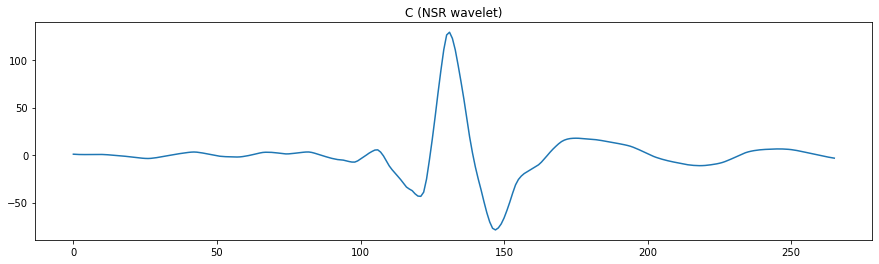

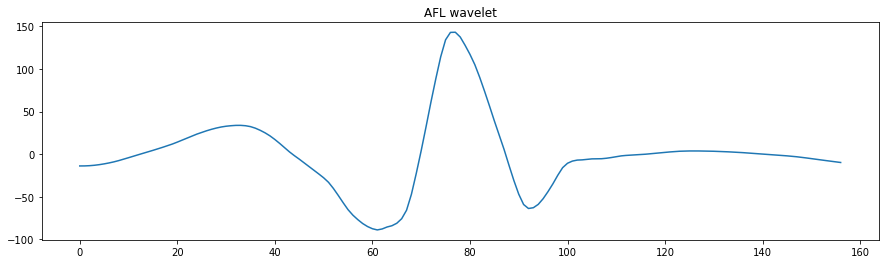

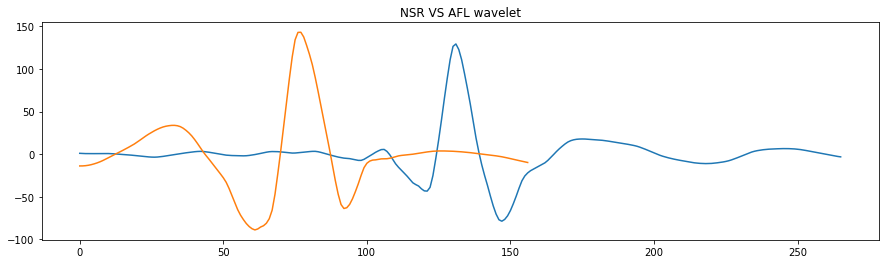

In [23]:
examples1 = qrs_db[qrs_db['condition'] == '1 NSR']
examples2 = qrs_db[qrs_db['condition'] == '3 AFL']
examples1 = examples1.head(20)
examples2 = examples2.head(20)
qrs_db = pd.concat([examples1, examples2])
qrs_db = qrs_db.reset_index(drop = True)

print(qrs_db)

plt.figure(figsize=(15,4))
plt.title('C (NSR wavelet)')
wav1 = qrs_db.iloc[1]
wav1w = wav1['wavelet']
wav2 = qrs_db.iloc[24]
wav2 = wav2['wavelet']
plt.plot(wav1w)
plt.show()
plt.figure(figsize=(15,4))
plt.title('AFL wavelet')
plt.plot(wav2)
plt.show()
plt.figure(figsize=(15,4))
plt.title('NSR VS AFL wavelet')
plt.plot(wav1w)
plt.plot(wav2)
plt.show()

[129.33991878]
43.460095365622216
[172.80001415]


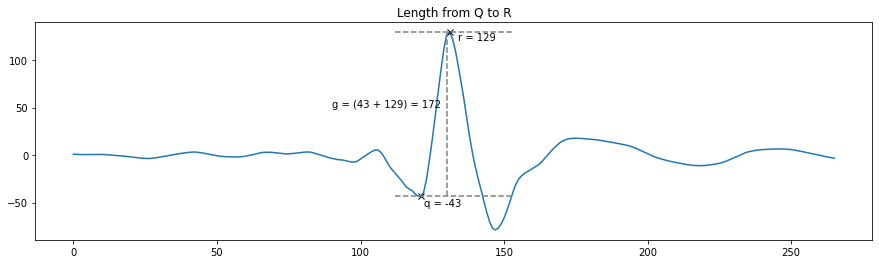

[129.33991878]
78.79601165658701
[208.13593044]


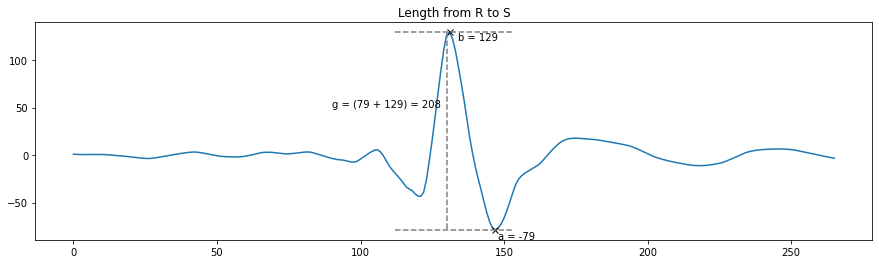

In [24]:
from libraries.feature_extraction import IntervalLengthExtractor
from scipy.signal import find_peaks

ile = IntervalLengthExtractor()
i_lengths = ile.fit(qrs_db)
qrs_db['interval lengths'] = i_lengths

p1, pos1 = find_peaks(wav1w, 25)
p2, pos2 = find_peaks(-wav1w, 25)

pos1 = pos1['peak_heights']
pos2 = pos2['peak_heights']


p3 = p2[1]
p2 = p2[0]

plt.figure(figsize=(15,4))
plt.title('Length from Q to R')
plt.plot(wav1w)
plt.plot(p1, wav1w[p1], 'x', color='black')
plt.plot(p2, wav1w[p2], 'x', color='black')
w22 = -wav1w[p2]
print(wav1w[p1])
print(w22)
print(wav1w[p1] + w22)
plt.axhline(wav1w[p1], xmin=0.43, xmax=0.57, color='grey', linestyle='--')
plt.axhline(wav1w[p2], xmin=0.43, xmax=0.57, color='grey', linestyle='--')
plt.axvline(130, ymin=0.2, ymax=0.95, color='grey', linestyle='--')
plt.annotate('g = (43 + 129) = 172', xy =(90, 50))
plt.annotate('q = -43', xy =(p2 + 1, wav1w[p2] - 10))
plt.annotate('r = 129', xy =(p1 + 3, wav1w[p1] - 8))
plt.show()

plt.figure(figsize=(15,4))
plt.title('Length from R to S')
plt.plot(wav1w)
plt.plot(p1, wav1w[p1], 'x', color='black')
plt.plot(p3, wav1w[p3], 'x', color='black')
w22 = -wav1w[p3]
print(wav1w[p1])
print(w22)
print(wav1w[p1] + w22)
plt.axhline(wav1w[p1], xmin=0.43, xmax=0.57, color='grey', linestyle='--')
plt.axhline(wav1w[p3], xmin=0.43, xmax=0.57, color='grey', linestyle='--')
plt.axvline(130, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.annotate('g = (79 + 129) = 208', xy =(90, 50))
plt.annotate('a = -79', xy =(p3 + 1, wav1w[p3] - 10))
plt.annotate('b = 129', xy =(p1 + 3, wav1w[p1] - 8))
plt.show()

In [25]:
from libraries.feature_extraction import QRSFeatureExtractor

qrse = QRSFeatureExtractor(c = 30)
qr_heights, rs_heights, qs_lengths = qrse.fit(qrs_db)

qrs_db['qr heights'] = qr_heights
qrs_db['rs heights'] = rs_heights
qrs_db['qs lengths'] = qs_lengths

print(qr_heights)
print(rs_heights)
print(qs_lengths)
wav1w = wav1['wavelet']


[162.33853160474078, 172.80001414688618, 175.34005072275318, 183.09525004110827, 208.4204215858161, 169.60603962091778, 158.9163475659816, 168.8459949678732, 156.41102853041758, 170.7459003864979, 137.31259643389922, 190.23241320506565, 145.23427007645236, 165.9682646417533, 153.19238288067834, 154.25621101003782, 176.01387087581503, 164.13846690757745, 161.70727310068725, 170.67998399746267, 170.43851920265317, 127.9600298510767, 124.573036371131, 234.38494741206597, 122.7786836856038, 119.00745622003949, 225.25431836160732, 123.62358664925063, 210.73754783916092, 203.1437144447461, 176.619952807049, 267.6223752796438, 158.55255477104132, 160.07374920570342, 130.6845830293787, 134.98237980203268, 173.86061896293432, 153.45024040639902, 170.15496420569227, 175.56033862930212]
[168.47119487961092, 208.135930437851, 146.59226833514458, 212.72511153091548, 167.30692492654157, 139.01639287642297, 164.1055449977722, 175.12355764419388, 166.23766716869312, 139.61428012228504, 159.56026567049

In [26]:
from libraries.feature_extraction import TimeGapExtractor
import matplotlib 

sqle = TimeGapExtractor(c = 20)
sqlengths = sqle.fit(qrs_db)

qrs_db['Trajectory between two ventricular contractions'] = sqlengths

print(qrs_db.head(40))

   condition name  ecg    partof  \
0      1 NSR  NaN  NaN  100m (0)   
1      1 NSR  NaN  NaN  100m (0)   
2      1 NSR  NaN  NaN  100m (0)   
3      1 NSR  NaN  NaN  100m (0)   
4      1 NSR  NaN  NaN  100m (0)   
5      1 NSR  NaN  NaN  100m (0)   
6      1 NSR  NaN  NaN  100m (0)   
7      1 NSR  NaN  NaN  100m (0)   
8      1 NSR  NaN  NaN  100m (0)   
9      1 NSR  NaN  NaN  100m (0)   
10     1 NSR  NaN  NaN  100m (0)   
11     1 NSR  NaN  NaN  100m (0)   
12     1 NSR  NaN  NaN  100m (1)   
13     1 NSR  NaN  NaN  100m (1)   
14     1 NSR  NaN  NaN  100m (1)   
15     1 NSR  NaN  NaN  100m (1)   
16     1 NSR  NaN  NaN  100m (1)   
17     1 NSR  NaN  NaN  100m (1)   
18     1 NSR  NaN  NaN  100m (1)   
19     1 NSR  NaN  NaN  100m (1)   
20     3 AFL  NaN  NaN  202m (0)   
21     3 AFL  NaN  NaN  202m (0)   
22     3 AFL  NaN  NaN  202m (0)   
23     3 AFL  NaN  NaN  202m (0)   
24     3 AFL  NaN  NaN  202m (0)   
25     3 AFL  NaN  NaN  202m (0)   
26     3 AFL  NaN  NaN  202m

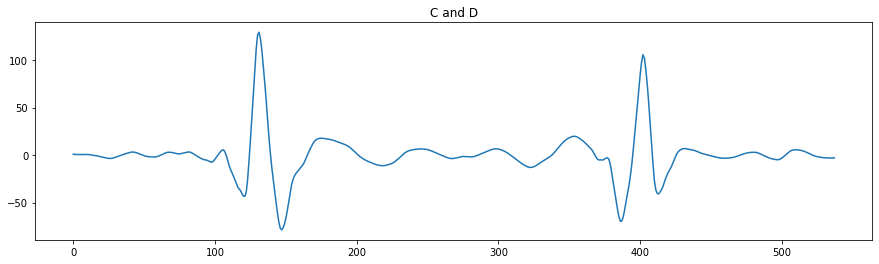

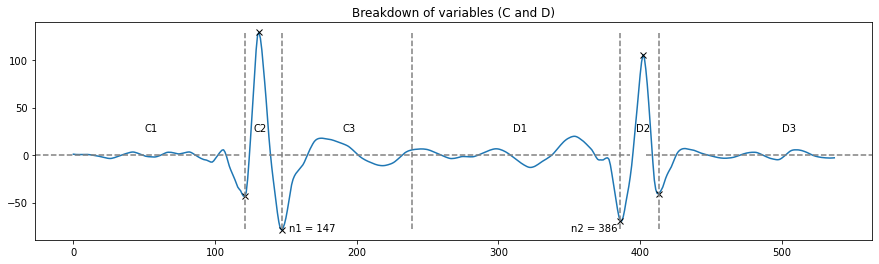

147
386


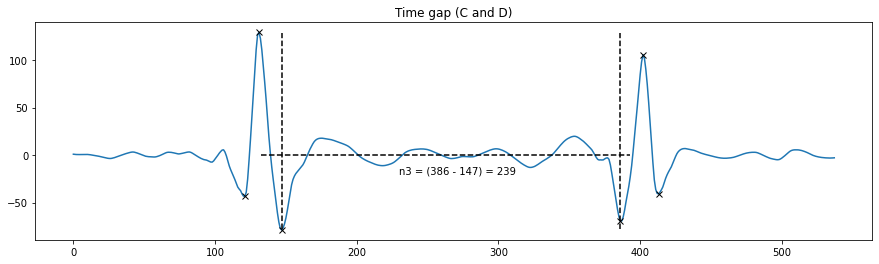

In [27]:
wav11 = qrs_db.iloc[2]
wav11w = wav11['wavelet']
demo = np.hstack((wav1w, wav11w))
high, pos1 = find_peaks(demo, height=20)
low, pos2 = find_peaks(-demo, height=20)

q1 = low[0]
s1 = low[1]
q2 = low[2]
s2 = low[-1]

plt.figure(figsize=(15,4))
plt.title('C and D')
plt.plot(demo)
plt.show()

plt.figure(figsize=(15,4))
plt.title('Breakdown of variables (C and D)')
plt.plot(demo)
plt.plot(high, demo[high], 'x', color='black')
plt.plot(low, demo[low], 'x', color='black')
plt.axvline(q1, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.axvline(s1, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.axvline(q2, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.axvline(s2, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.axvline(wav11[-1], ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.axhline(0, xmin=0.27, xmax=0.71, color='grey', linestyle='--')
plt.axhline(0, xmin=0.73, xmax=1, color='grey', linestyle='--')
plt.axhline(0, xmin=0, xmax=0.245, color='grey', linestyle='--')
plt.annotate('C1', xy =(50, 25))
plt.annotate('C2', xy =(127, 25))
plt.annotate('C3', xy =(190, 25))
plt.annotate('n1 = 147', xy =((s1 + 5), -80))
plt.annotate('n2 = 386', xy =((q2 - 35), -80))
plt.annotate('D1', xy =(310, 25))
plt.annotate('D2', xy =(397, 25))
plt.annotate('D3', xy =(500, 25))
plt.show()

print(s1)
print(q2)

plt.figure(figsize=(15,4))
plt.title('Time gap (C and D)')
plt.plot(demo)
plt.plot(high, demo[high], 'x', color='black')
plt.plot(low, demo[low], 'x', color='black')
plt.axvline(s1, ymin=0.05, ymax=0.95, color='black', linestyle='--')
plt.axvline(q2, ymin=0.05, ymax=0.95, color='black', linestyle='--')
plt.axhline(0, xmin=0.27, xmax=0.71, color='black', linestyle='--')
plt.annotate('n3 = (386 - 147) = 239', xy =(230, -20))
plt.show()

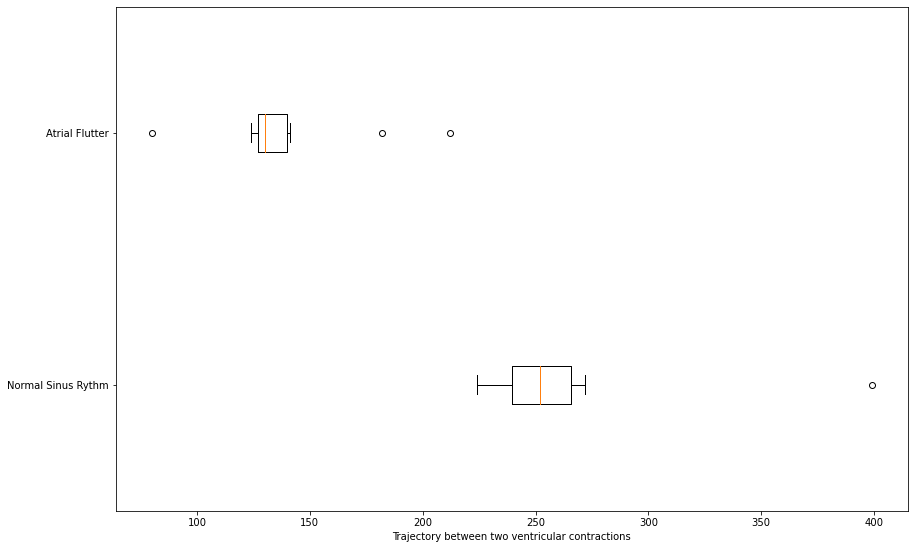

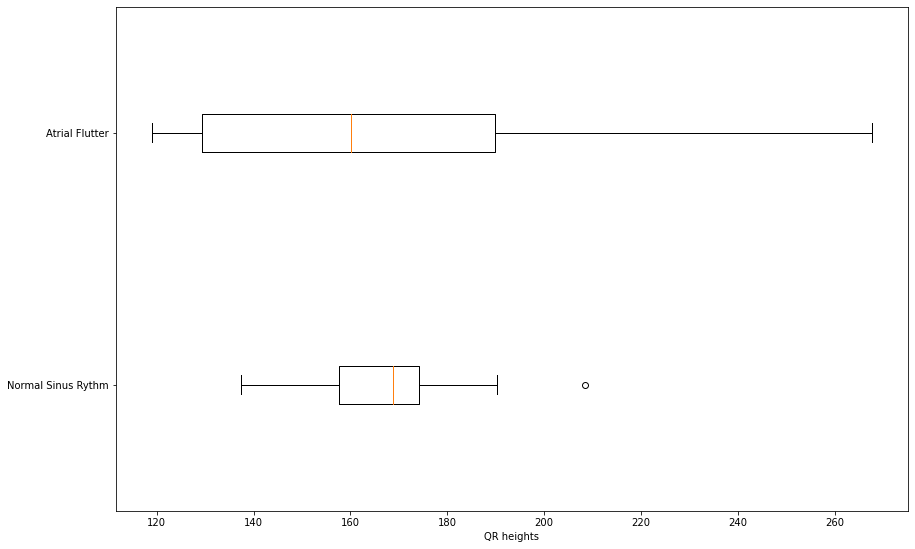

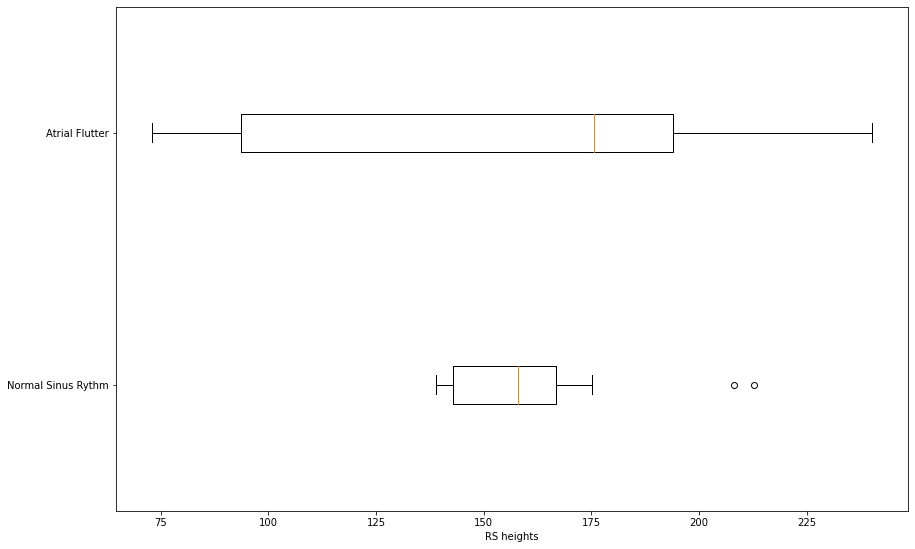

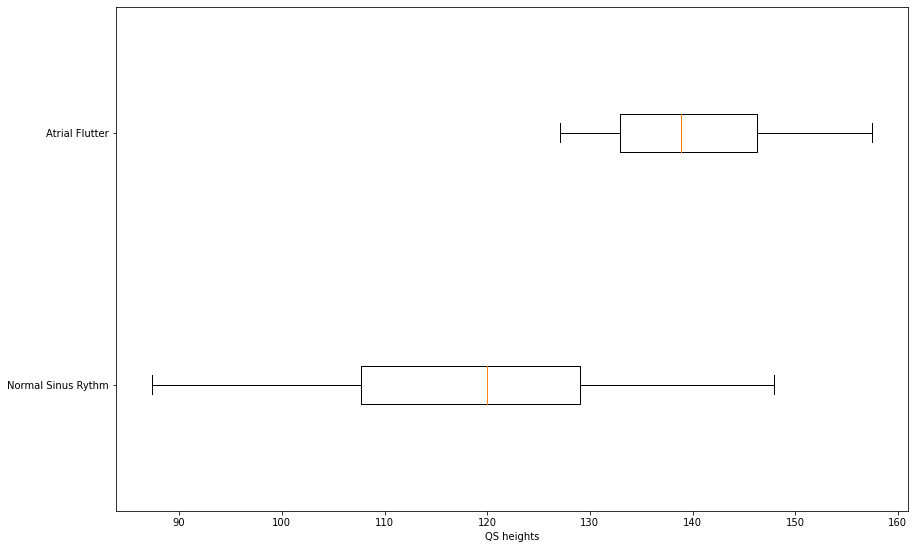

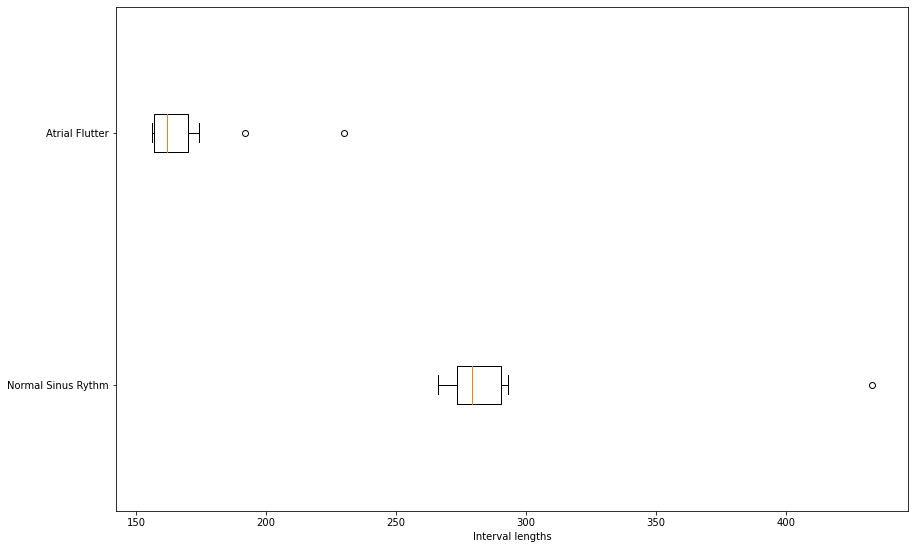

In [28]:
NSR = qrs_db[1:20]
AFL = qrs_db[21:40]

data = [NSR['Trajectory between two ventricular contractions'], AFL['Trajectory between two ventricular contractions']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
#ax.set_xlim(xmin=0)
ax.set_xlabel('Trajectory between two ventricular contractions') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['qr heights'], AFL['qr heights']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('QR heights') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['rs heights'], AFL['rs heights']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('RS heights') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['qs lengths'], AFL['qs lengths']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('QS heights') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

data = [NSR['interval lengths'], AFL['interval lengths']] 
  
fig = plt.figure(figsize =(11, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data, vert = 0) 
ax.set_xlabel('Interval lengths') 
ax.set_yticklabels(['Normal Sinus Rythm', 'Atrial Flutter']) 


# show plot 
plt.show(bp) 

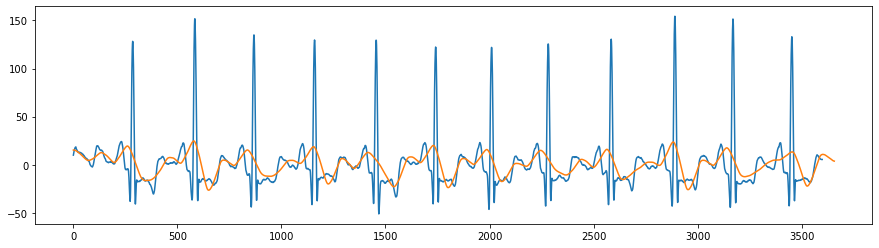

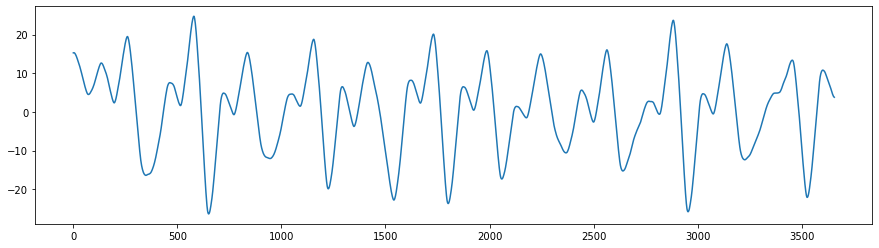

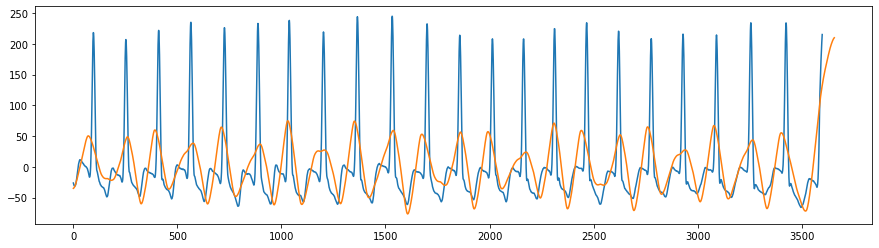

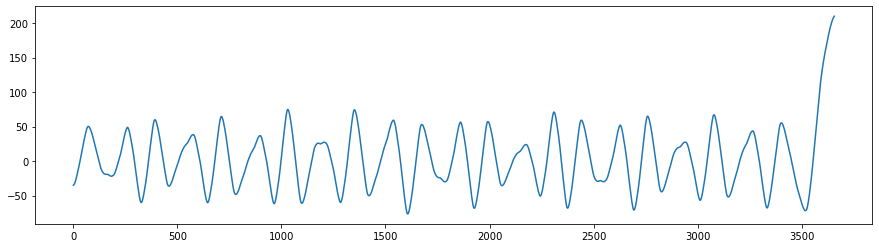

In [29]:
small_example = example1['small frequencies']
small_example2 = example2['small frequencies']

plt.figure(figsize=(15,4))
plt.plot(example1['ecg'])
plt.plot(small_example)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(small_example)

plt.figure(figsize=(15,4))
plt.plot(example2['ecg'])
plt.plot(small_example2)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(small_example2)

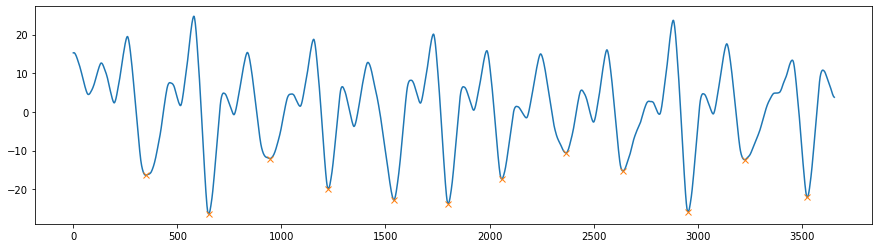

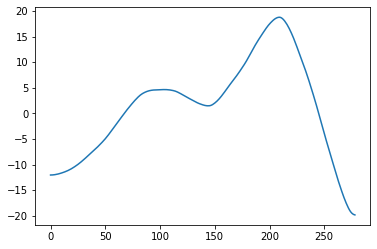

In [40]:
pt, pos_pt = find_peaks(-small_example, 5)

pos_pt = pos_pt['peak_heights']

plt.figure(figsize=(15,4))
plt.plot(small_example)
plt.plot(pt, small_example[pt], 'x')
plt.show()

a1 = pt[2]
a2 = pt[3]

a = small_example[a1:a2]
plt.plot(a)

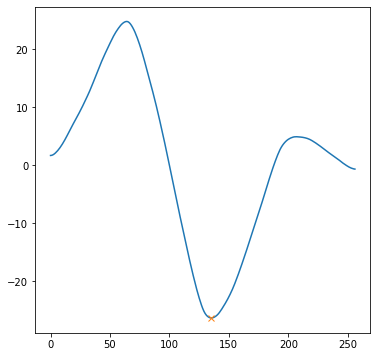

In [31]:
pt, pos_pt = find_peaks(-a, -10)

plt.figure(figsize=(6,6))
plt.plot(a)
plt.plot(pt, a[pt], 'x')
plt.show()

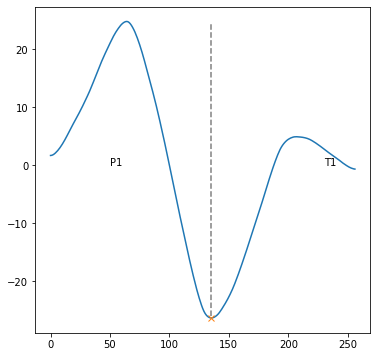

In [32]:
pt, pos_pt = find_peaks(-a, -10)

plt.figure(figsize=(6,6))
plt.plot(a)
plt.plot(pt, a[pt], 'x')
plt.axvline(pt, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
plt.annotate('P1', xy =(50, 0))
plt.annotate('T1', xy =(230, 0))
plt.show()

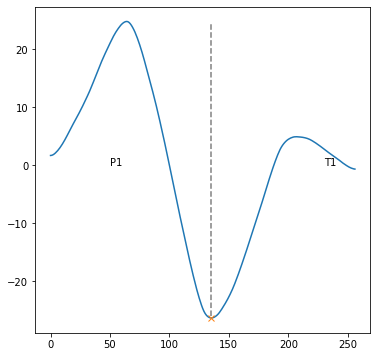

In [33]:
plt.figure(figsize=(6,6))
plt.plot(a)
plt.plot(pt, a[pt], 'x')
plt.annotate('P1', xy =(50, 0))
plt.annotate('T1', xy =(230, 0))
plt.axvline(pt, ymin=0.05, ymax=0.95, color='grey', linestyle='--')

plt.show()

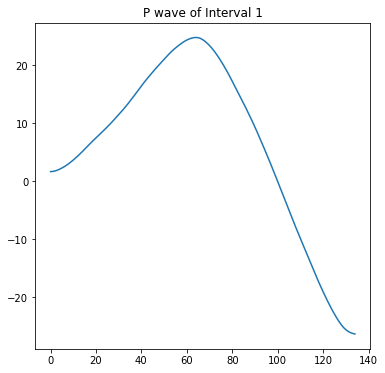

135
256


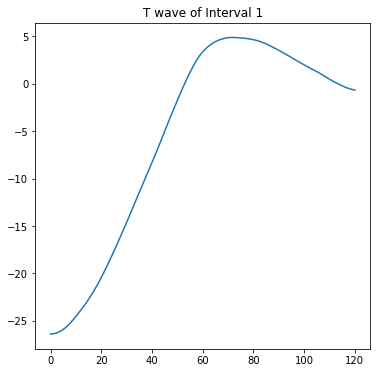

In [34]:
plt.figure(figsize=(6,6))
pt1 = pt[0]
a1 = a[0:pt1]

plt.plot(a1)
plt.title('P wave of Interval 1')
plt.show()

plt.figure(figsize=(6,6))
apk = int(a.size - 1)
print(pt1)
print(apk)
a2 = a[pt1:apk]
plt.title('T wave of Interval 1')
plt.plot(a2)
plt.show()

In [35]:
def small_feature_extraction_design(s, t):
    plt.figure(figsize=(6,6))
    pt1, pos_pt1 = find_peaks(s, 0)
    height = pos_pt1['peak_heights']
    h1 = height[0]
    plt.plot(s)
    plt.plot(pt1, s[pt1], 'x')
    plt.axhline(s[0], xmin=0, xmax=0.6, color='grey', linestyle='--')
    plt.axhline(h1, xmin=0.2, xmax=0.8, color='grey', linestyle='--')
    plt.axvline(pt1, ymin=0.55, ymax=0.95, color='grey', linestyle='--')
    plt.title('P wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    pt2, pos_pt2 = find_peaks(t, 0)
    height = pos_pt2['peak_heights']
    h2 = height[0]
    plt.plot(t)
    plt.plot(pt2, t[pt2], 'x')
    plt.axhline(t[0], xmin=0, xmax=0.8, color='grey', linestyle='--')
    plt.axhline(h2, xmin=0.2, xmax=0.8, color='grey', linestyle='--')
    plt.axvline(pt2, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(s)
    plt.plot(pt1, s[pt1], 'x')
    plt.axhline(12, xmin=0.05, xmax=0.47, color='grey', linestyle='--')
    plt.axvline(0, ymin=0.5, ymax=1, color='grey', linestyle='--')
    plt.axvline(pt1, ymin=0.5, ymax=1, color='grey', linestyle='--')
    plt.title('P wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(t)
    plt.plot(pt2, t[pt2], 'x')
    plt.axhline(-2, xmin=0.05, xmax=0.58, color='grey', linestyle='--')
    plt.axvline(0, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.axvline(pt2, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(s)
    plt.plot(pt1, s[pt1], 'x')
    plt.axhline(h1, xmin=0.4, xmax=0.97, color='grey', linestyle='--')
    plt.axhline(s[-1], xmin=0.4, xmax=0.97, color='grey', linestyle='--')
    plt.axvline(100, ymin=0.05, ymax=0.95, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(t)
    plt.plot(pt2, t[pt2], 'x')
    plt.axhline(h2, xmin=0.4, xmax=0.97, color='grey', linestyle='--')
    plt.axhline(t[-1], xmin=0.4, xmax=0.97, color='grey', linestyle='--')
    plt.axvline(90, ymin=0.8, ymax=0.95, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(s)
    plt.plot(pt1, s[pt1], 'x')
    plt.axhline(12, xmin=0.49, xmax=0.95, color='grey', linestyle='--')
    plt.axvline(pt1, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.axvline(s.size, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.title('P wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(t)
    plt.plot(pt2, t[pt2], 'x')
    plt.axhline(-2, xmin=0.6, xmax=0.95, color='grey', linestyle='--')
    plt.axvline(pt2, ymin=0.6, ymax=1, color='grey', linestyle='--')
    plt.axvline(t.size, ymin=0.6, ymax=1, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(s)
    plt.axhline(12, xmin=0.05, xmax=0.95, color='grey', linestyle='--')
    plt.axvline(0, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.axvline(s.size, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.title('P wave of Interval')
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(t)
    plt.axhline(-2, xmin=0.05, xmax=0.95, color='grey', linestyle='--')
    plt.axvline(0, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.axvline(t.size, ymin=0, ymax=1, color='grey', linestyle='--')
    plt.title('T wave of Interval')
    plt.show()
    
    

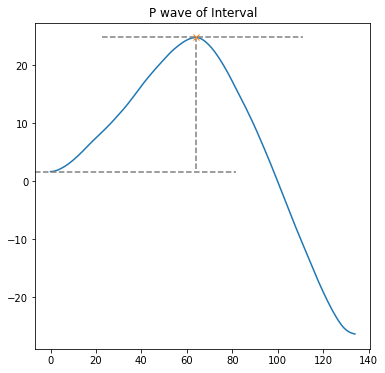

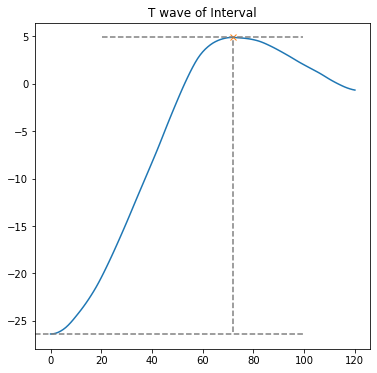

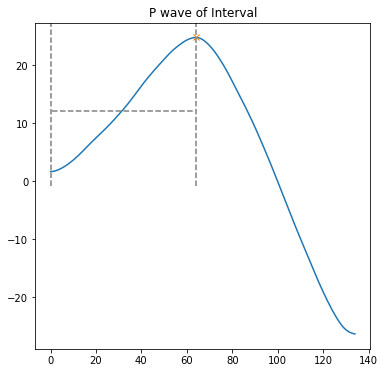

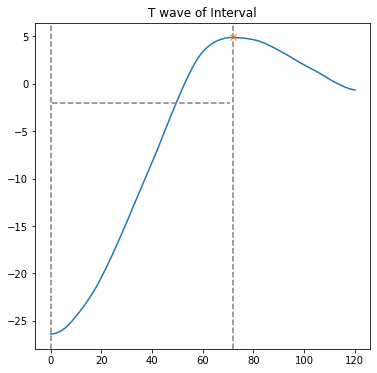

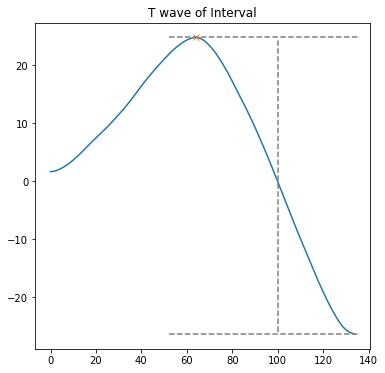

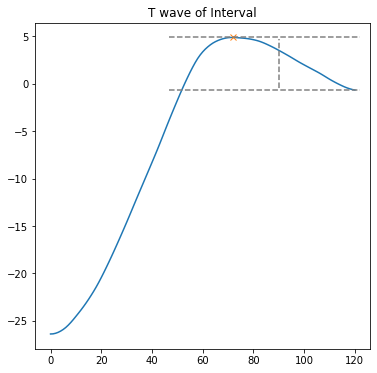

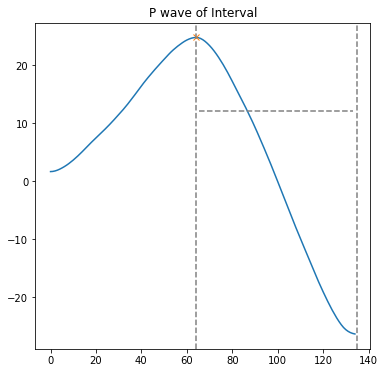

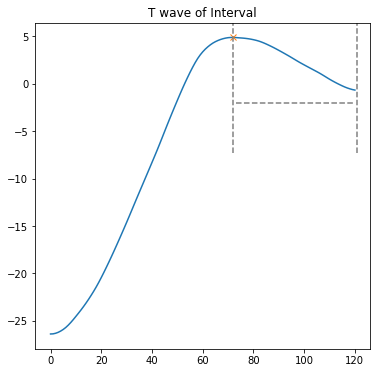

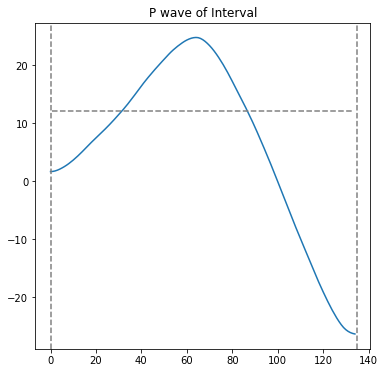

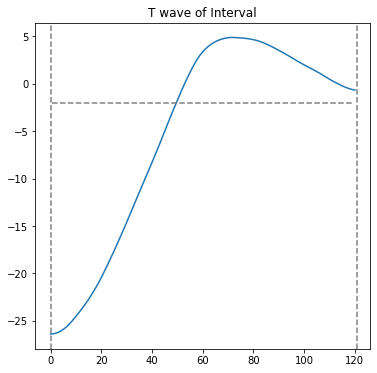

In [36]:
small_feature_extraction_design(a1, a2)

In [41]:
from libraries.feature_extraction import SmallFrequencySeparator

sfs = SmallFrequencySeparator()

p_db, t_db = sfs.fit(database)

print(p_db.head())
print(t_db.head())

In [38]:
#font = {'family' : 'normal',
        #'size'   : 14}

#matplotlib.rc('font', **font)